In [1]:
library(ggplot2)
options(repr.plot.height=12,repr.plot.width=18)

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [3]:
airbnb[1:6,]

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
colnames(airbnb)<-newnames
colnames(airbnb)


[1] "CodigoPostal"   "Barrio"         "TipoPropiedad"  "TipoAlquiler"  
 [5] "MaxOcupantes"   "NumBanyos"      "NumDormitorios" "NumCamas"      
 [9] "TipoCama"       "Comodidades"    "PiesCuadrados"  "Precio"        
[13] "Puntuacion"

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
str(airbnb$PiesCuadrados)
summary(airbnb$PiesCuadrados)

 int [1:13207] NA NA NA NA 538 NA NA NA 700 NA ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0       0     108     378     646    5167   12688 

In [6]:
airbnb$MetrosCuadrados<-airbnb$PiesCuadrados*0.092903
summary(na.omit(airbnb$MetrosCuadrados))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00   10.03   35.12   60.02  480.03 

In [7]:
#antes de seguir, voy a seleccionar solo las columnas que utilizare en el resto del ejercicio
colnames(airbnb)
abnb<-airbnb[,c(1,2,4,5,6,7,12,14)]
colnames(abnb)


[1] "CodigoPostal"    "Barrio"          "TipoPropiedad"   "TipoAlquiler"   
 [5] "MaxOcupantes"    "NumBanyos"       "NumDormitorios"  "NumCamas"       
 [9] "TipoCama"        "Comodidades"     "PiesCuadrados"   "Precio"         
[13] "Puntuacion"      "MetrosCuadrados"

[1] "CodigoPostal"    "Barrio"          "TipoAlquiler"    "MaxOcupantes"   
[5] "NumBanyos"       "NumDormitorios"  "Precio"          "MetrosCuadrados"

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [8]:
summary(abnb$CodigoPostal)
table(abnb$CodigoPostal)

-        20013        20126         2015        25008 
         439            1            1            1            1            1 
       27004        27013           28        28001       280013        28002 
           1            1            1          231            1          170 
28002\n28002        28003        28004        28005        28006        28007 
           1          185         1794         1194          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1019 
       28014        28015        28016        28017        28018        28019 
         630          600           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         192           58           30           23           44          123 
       28026        28027        28028        28029        28030        28031 
          93          122          263          110           73           27 
       28032        28033        28034        28035        28036        28037 
          33           89           45           59           67           65 
       28038        28039         2804        28040        28041        28042 
          77          160            1           16           63           90 
       28043        28044        28045        28046        28047        28048 
         103           19          495           32           67            1 
       28049         2805        28050        28051 28051\n28051        28052 
           3            1           58           16            1            1 
       28053        28054        28055        28056        28058        28060 
          85           12           12            1            1            1 
       28094        28105         2815        28850 Madrid 28004 
           1            1            1            1            1


                        -        20013        20126         2015        25008 
         439            1            1            1            1            1 
       27004        27013           28        28001       280013        28002 
           1            1            1          231            1          170 
28002\n28002        28003        28004        28005        28006        28007 
           1          185         1794         1194          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1019 
       28014        28015        28016        28017        28018        28019 
         630          600           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         192           58           30           23           44          123 
       28026        28027        28028        28029

In [9]:
abnb[abnb$CodigoPostal == "28002\n28002",1]<-28002
abnb[abnb$CodigoPostal == "28051\n28051",1]<-28051
abnb[abnb$CodigoPostal == "2804",1]<-28004
abnb[abnb$CodigoPostal == "Madrid 28004",1]<-28004
abnb[abnb$CodigoPostal == "2805",1]<-28005
abnb[abnb$CodigoPostal == "2815" | abnb$CodigoPostal == "2015" ,1]<-28015

In [10]:
abnb[abnb$CodigoPostal == "-" | abnb$CodigoPostal == "" | abnb$CodigoPostal == 28,1]
abnb[abnb$CodigoPostal == "-" | abnb$CodigoPostal == "" | abnb$CodigoPostal == 28,1]<- NA


[1]                                                                           
 [26]                                                                           
 [51]                                                                           
 [76]                                                                           
[101]                                                                           
[126]                                                                           
[151]                                                                           
[176]                                                                           
[201]                                                                           
[226]                                                                           
[251]                                                                           
[276]                                                                           
[301]                                                                           
[326]                                  -                                      28
[351]                                                                           
[376]                                                                           
[401]                                                                           
[426]                                                
77 Levels:  - 20013 20126 2015 25008 27004 27013 28 28001 280013 ... Madrid 28004

In [11]:
summary(abnb$CodigoPostal)
abnb$CodigoPostal<-droplevels(abnb$CodigoPostal)
table(abnb$CodigoPostal)

-        20013        20126         2015        25008 
           0            0            1            1            0            1 
       27004        27013           28        28001       280013        28002 
           1            1            0          231            1          171 
28002\n28002        28003        28004        28005        28006        28007 
           0          185         1796         1195          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1019 
       28014        28015        28016        28017        28018        28019 
         630          602           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         192           58           30           23           44          123 
       28026        28027        28028        28029        28030        28031 
          93          122          263          110           73           27 
       28032        28033        28034        28035        28036        28037 
          33           89           45           59           67           65 
       28038        28039         2804        28040        28041        28042 
          77          160            0           16           63           90 
       28043        28044        28045        28046        28047        28048 
         103           19          495           32           67            1 
       28049         2805        28050        28051 28051\n28051        28052 
           3            0           58           17            0            1 
       28053        28054        28055        28056        28058        28060 
          85           12           12            1            1            1 
       28094        28105         2815        28850 Madrid 28004         NA's 
           1            1            0            1            0          441


 20013  20126  25008  27004  27013  28001 280013  28002  28003  28004  28005 
     1      1      1      1      1    231      1    171    185   1796   1195 
 28006  28007  28008  28009  28010  28011  28012  28013  28014  28015  28016 
   218    206    338    216    384    250   2060   1019    630    602     76 
 28017  28018  28019  28020  28021  28022  28023  28024  28025  28026  28027 
   107     43    200    192     58     30     23     44    123     93    122 
 28028  28029  28030  28031  28032  28033  28034  28035  28036  28037  28038 
   263    110     73     27     33     89     45     59     67     65     77 
 28039  28040  28041  28042  28043  28044  28045  28046  28047  28048  28049 
   160     16     63     90    103     19    495     32     67      1      3 
 28050  28051  28052  28053  28054  28055  28056  28058  28060  28094  28105 
    58     17      1     85     12     12      1      1      1      1      1 
 28850 
     1 

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [12]:
levels(abnb$CodigoPostal)
summary(abnb$CodigoPostal)

[1] "20013"  "20126"  "25008"  "27004"  "27013"  "28001"  "280013" "28002" 
 [9] "28003"  "28004"  "28005"  "28006"  "28007"  "28008"  "28009"  "28010" 
[17] "28011"  "28012"  "28013"  "28014"  "28015"  "28016"  "28017"  "28018" 
[25] "28019"  "28020"  "28021"  "28022"  "28023"  "28024"  "28025"  "28026" 
[33] "28027"  "28028"  "28029"  "28030"  "28031"  "28032"  "28033"  "28034" 
[41] "28035"  "28036"  "28037"  "28038"  "28039"  "28040"  "28041"  "28042" 
[49] "28043"  "28044"  "28045"  "28046"  "28047"  "28048"  "28049"  "28050" 
[57] "28051"  "28052"  "28053"  "28054"  "28055"  "28056"  "28058"  "28060" 
[65] "28094"  "28105"  "28850"

20013  20126  25008  27004  27013  28001 280013  28002  28003  28004  28005 
     1      1      1      1      1    231      1    171    185   1796   1195 
 28006  28007  28008  28009  28010  28011  28012  28013  28014  28015  28016 
   218    206    338    216    384    250   2060   1019    630    602     76 
 28017  28018  28019  28020  28021  28022  28023  28024  28025  28026  28027 
   107     43    200    192     58     30     23     44    123     93    122 
 28028  28029  28030  28031  28032  28033  28034  28035  28036  28037  28038 
   263    110     73     27     33     89     45     59     67     65     77 
 28039  28040  28041  28042  28043  28044  28045  28046  28047  28048  28049 
   160     16     63     90    103     19    495     32     67      1      3 
 28050  28051  28052  28053  28054  28055  28056  28058  28060  28094  28105 
    58     17      1     85     12     12      1      1      1      1      1 
 28850   NA's 
     1    441

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [13]:
paste("los 5 codigos con mas entradas son:")
sort(summary(abnb$CodigoPostal), decreasing=T,na.last = NA)[1:5]

paste("los 5 codigos con menos entradas son:")

sort(summary(abnb$CodigoPostal), decreasing=F,na.last = NA)[1:5]

[1] "los 5 codigos con mas entradas son:"

28012 28004 28005 28013 28014 
 2060  1796  1195  1019   630

[1] "los 5 codigos con menos entradas son:"

20013 20126 25008 27004 27013 
    1     1     1     1     1

¿Cuales son los barrios que hay en el código postal 28012?

In [14]:
unique(na.omit(abnb[abnb$CodigoPostal == 28012 , 2]))

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [15]:
CP28012<-as.data.frame(table(abnb[abnb$CodigoPostal == 28012 , 2]))
CP28012[CP28012$Freq > 0,]


,Var1,Freq
,<fct>,<int>
2,Acacias,13
14,Arapiles,1
18,Atocha,1
41,Cortes,216
45,Delicias,1
49,Embajadores,1449
56,Goya,1
81,Palacio,27
85,Palos de Moguer,46


¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [16]:
paste("los barrios en el dataset son:")
unique(abnb$Barrio)
paste("en total son: ", length(unique(abnb$Barrio)))



[1] "los barrios en el dataset son:"

[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] Aluche                       San Isidro                  
 [39] Campamento                   Comillas                    
 [41] Opañel                       Vista Alegre                
 [43] Ciudad Jardín                Hispanoamérica              
 [45] Nueva España                 Castilla                    
 [47] Bellas Vistas                Cuatro Caminos              
 [49] Castillejos                  Vallehermoso                
 [51] Almenara                     Valdeacederas               
 [53] Berruguete                   Gaztambide                  
 [55] Rios Rosas                   Peñagrande                  
 [57] Argüelles                    Puerta Bonita               
 [59] Buenavista                   Abrantes                    
 [61] Orcasur                      San Fermín                  
 [63] Almendrales                  Pradolongo                  
 [65] Portazgo                     Entrevías                   
 [67] San Diego                    Palomeras Bajas             
 [69] Fontarrón                    Vinateros                   
 [71] Ventas                       Pueblo Nuevo                
 [73] Quintana                     Concepción                  
 [75] San Juan Bautista            Costillares                 
 [77] Piovera                      Canillas                    
 [79] Pinar del Rey                Apostol Santiago            
 [81] San Andrés                   Valdefuentes                
 [83] Butarque                     Los Angeles                 
 [85] Casco Histórico de Vicálvaro Simancas                    
 [87] Rejas                        Salvador                    
 [89] Casco Histórico de Barajas   Pilar                       
 [91] La Paz                       Mirasierra                  
 [93] Ciudad Universitaria         Moscardó                    
 [95] Palomeras Sureste            Marroquina                  
 [97] Media Legua                  Los Rosales                 
 [99] Casco Histórico de Vallecas  Timón                       
[101] Corralejos                   Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Aeropuerto                  
[107] Palomas                      Zofío                       
[109] Aguilas                      Legazpi                     
[111] Fuentelareina                Aravaca                     
[113] Ambroz                       Canillejas                  
[115] Valdezarza                   Amposta                     
[117] San Pascual                  Santa Eugenia               
[119] Arcos                        Rosas                       
[121] Valdemarín                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

[1] "en total son:  125"

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [17]:
sort(summary(abnb$Barrio), decreasing=T,na.last = NA)[1:5]

Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [18]:
summary(abnb$TipoAlquiler)

Entire home/apt    Private room     Shared room 
           7903            5113             191

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

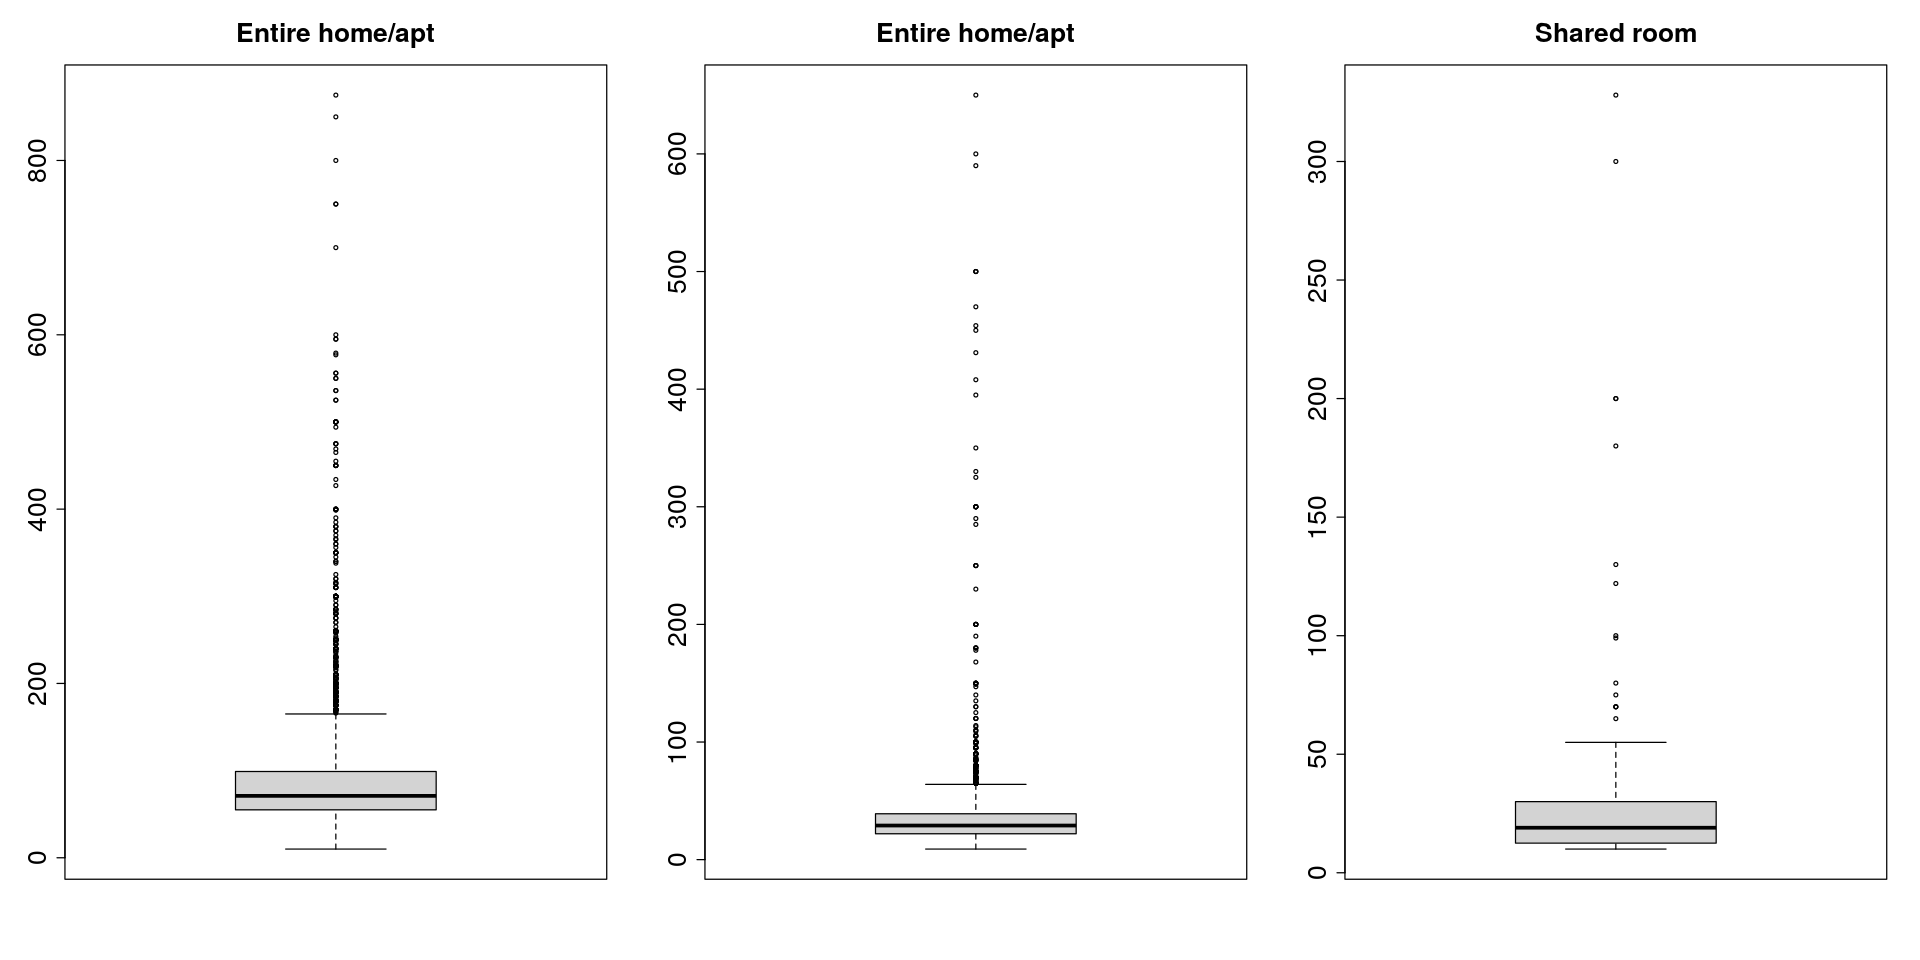

In [19]:
options(repr.plot.height=8,repr.plot.width=16)
par(mfrow=c(1,3))
boxplot(abnb[abnb$TipoAlquiler == "Entire home/apt", 7],cex.axis=2, cex.main =2, main = "Entire home/apt")
boxplot(abnb[abnb$TipoAlquiler == "Private room", 7],cex.axis=2,cex.main =2, main = "Entire home/apt")
boxplot(abnb[abnb$TipoAlquiler == "Shared room", 7],cex.axis=2, cex.main =2, main = "Shared room")

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [20]:
paste("El promedio de Entire home/apt es:", 
      mean(abnb[abnb$TipoAlquiler == "Entire home/apt", 7], na.rm=T), 
      ", con una desviacion estandar de ", 
      sd(abnb[abnb$TipoAlquiler == "Entire home/apt", 7], na.rm=T))
ENT<-abnb[abnb$TipoAlquiler == "Entire home/apt", 7]
length(ENT)
ENTsub<- sample(ENT, 5000, replace=FALSE)
shapiro.test(ENTsub)

paste("El promedio de Private room es:",
      mean(abnb[abnb$TipoAlquiler == "Private room", 7], na.rm=T),
      ", con una desviacion estandar de ", 
      sd(abnb[abnb$TipoAlquiler == "Private room", 7], na.rm=T))
PR<-abnb[abnb$TipoAlquiler == "Private room", 7]
length(PR)
PRsub<- sample(PR, 5000, replace=FALSE)
shapiro.test(PRsub)

paste("El promedio de Shared room es:",
      mean(abnb[abnb$TipoAlquiler == "Shared room", 7], na.rm=T),
      ", con una desviacion estandar de ",       
      sd(abnb[abnb$TipoAlquiler == "Shared room", 7], na.rm=T))
SR<-abnb[abnb$TipoAlquiler == "Shared room", 7]
length(SR)
shapiro.test(SR)

#dado que no hay normalidad, usamos kruskal-wallis y no ANOVA. un kruskal wallis test nos indica si las muestras provienen de la misma poblacion.
kruskal.test(list(ENT,PR,SR))

#almenos una cuenta con una diferencia en la media que es que es estadisticamente significicativa.

[1] "El promedio de Entire home/apt es: 87.2966058763931 , con una desviacion estandar de  58.4406958124831"

[1] 7903


	Shapiro-Wilk normality test

data:  ENTsub
W = 0.64116, p-value < 2.2e-16


[1] "El promedio de Private room es: 34.255135981217 , con una desviacion estandar de  31.7137678766116"

[1] 5113


	Shapiro-Wilk normality test

data:  PRsub
W = 0.38495, p-value < 2.2e-16


[1] "El promedio de Shared room es: 29.8534031413613 , con una desviacion estandar de  40.6432421577624"

[1] 191


	Shapiro-Wilk normality test

data:  SR
W = 0.4436, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  list(ENT, PR, SR)
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [50]:
airbnb_entire<-abnb[abnb$TipoAlquiler == "Entire home/apt",]
airbnb_entire<-droplevels(airbnb_entire)
summary(airbnb_entire)
str(airbnb_entire)
head(airbnb_entire)

  CodigoPostal          Barrio              TipoAlquiler   MaxOcupantes   
 28012  :1435   Embajadores:1228   Entire home/apt:7903   Min.   : 1.000  
 28004  :1271   Universidad: 984                          1st Qu.: 3.000  
 28005  : 803   Palacio    : 769                          Median : 4.000  
 28013  : 720   Sol        : 701                          Mean   : 4.051  
 28014  : 473   Cortes     : 574                          3rd Qu.: 5.000  
 (Other):2983   Justicia   : 534                          Max.   :16.000  
 NA's   : 218   (Other)    :3113                                          
   NumBanyos     NumDormitorios       Precio      MetrosCuadrados 
 Min.   :0.000   Min.   : 0.000   Min.   : 10.0   Min.   :  0.00  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 55.0   1st Qu.:  0.00  
 Median :1.000   Median : 1.000   Median : 71.0   Median : 27.04  
 Mean   :1.241   Mean   : 1.463   Mean   : 87.3   Mean   : 37.30  
 3rd Qu.:1.000   3rd Qu.: 2.000   3rd Qu.: 99.0   3rd Qu.: 60.02 

'data.frame':	7903 obs. of  8 variables:
 $ CodigoPostal   : Factor w/ 60 levels "20013","20126",..: 7 7 7 18 7 7 18 7 7 16 ...
 $ Barrio         : Factor w/ 119 levels "Abrantes","Acacias",..: 109 109 109 109 109 109 109 109 109 106 ...
 $ TipoAlquiler   : Factor w/ 1 level "Entire home/apt": 1 1 1 1 1 1 1 1 1 1 ...
 $ MaxOcupantes   : int  6 3 3 5 2 3 2 4 4 4 ...
 $ NumBanyos      : num  1 1 2 1 1 1 1 2 1 1 ...
 $ NumDormitorios : int  3 2 1 1 0 1 1 2 1 1 ...
 $ Precio         : int  92 55 60 75 55 70 90 155 70 75 ...
 $ MetrosCuadrados: num  NA NA NA 50 NA ...


,CodigoPostal,Barrio,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,Precio,MetrosCuadrados
,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<dbl>
2,28004,Universidad,Entire home/apt,6,1,3,92,NA
3,28004,Universidad,Entire home/apt,3,1,2,55,NA
4,28004,Universidad,Entire home/apt,3,2,1,60,NA
5,28015,Universidad,Entire home/apt,5,1,1,75,49.98181
6,28004,Universidad,Entire home/apt,2,1,0,55,NA
8,28004,Universidad,Entire home/apt,3,1,1,70,NA


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [51]:
sort(summary(airbnb_entire$Barrio), decreasing=T, na.last = NA)[1:5]

Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [52]:
abnbBarrioAgg<-aggregate(Precio~Barrio,airbnb_entire,mean,na.rm=T)
abnbBarrioAgg[order(abnbBarrioAgg$Precio, decreasing = T),][1:5,]


,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [53]:
Barrio<-airbnb_entire$Barrio
BarrioFreq<-as.data.frame(table(Barrio))
abnbBarrioFreq<-merge(abnbBarrioAgg,BarrioFreq)
abnbBarrioFreq[order(abnbBarrioFreq$Precio, decreasing = T),][1:5,]


,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
77,Palomas,309.7500,4
50,Fuentelareina,180.0000,2
93,Recoletos,161.9254,135
43,El Plantío,150.0000,1
30,Castellana,141.3889,73


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [54]:
abnbmayor100<-abnbBarrioFreq[abnbBarrioFreq$Freq > 100 ,]
abnbmayor100[order(abnbmayor100$Precio, decreasing=T),][1:5,]

,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
93,Recoletos,161.92537,135
52,Goya,111.33803,142
106,Sol,100.75036,701
108,Trafalgar,98.57848,223
59,Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


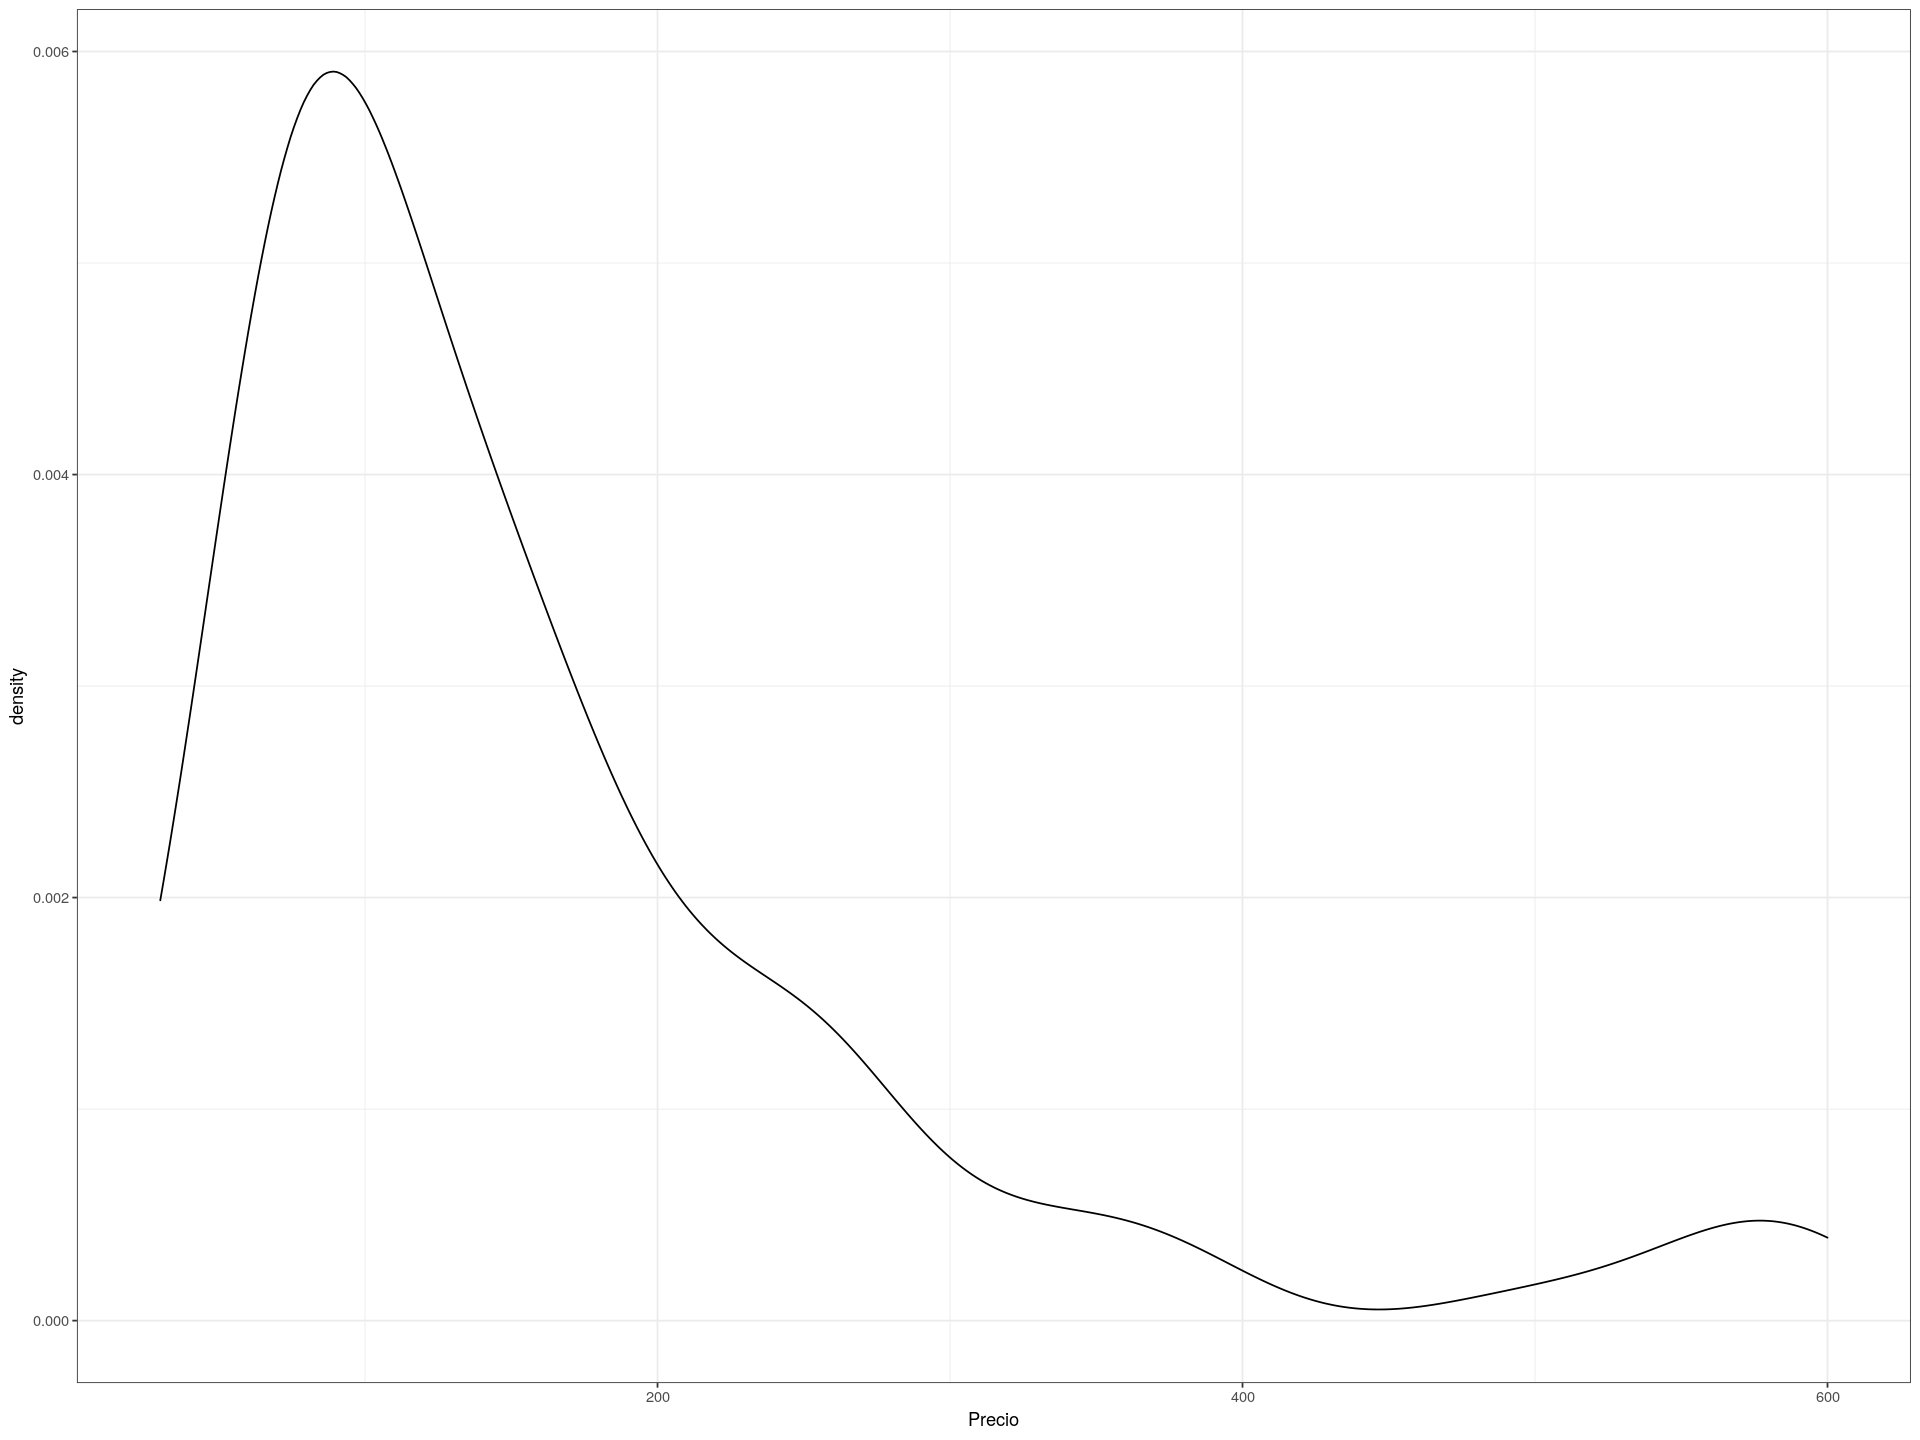

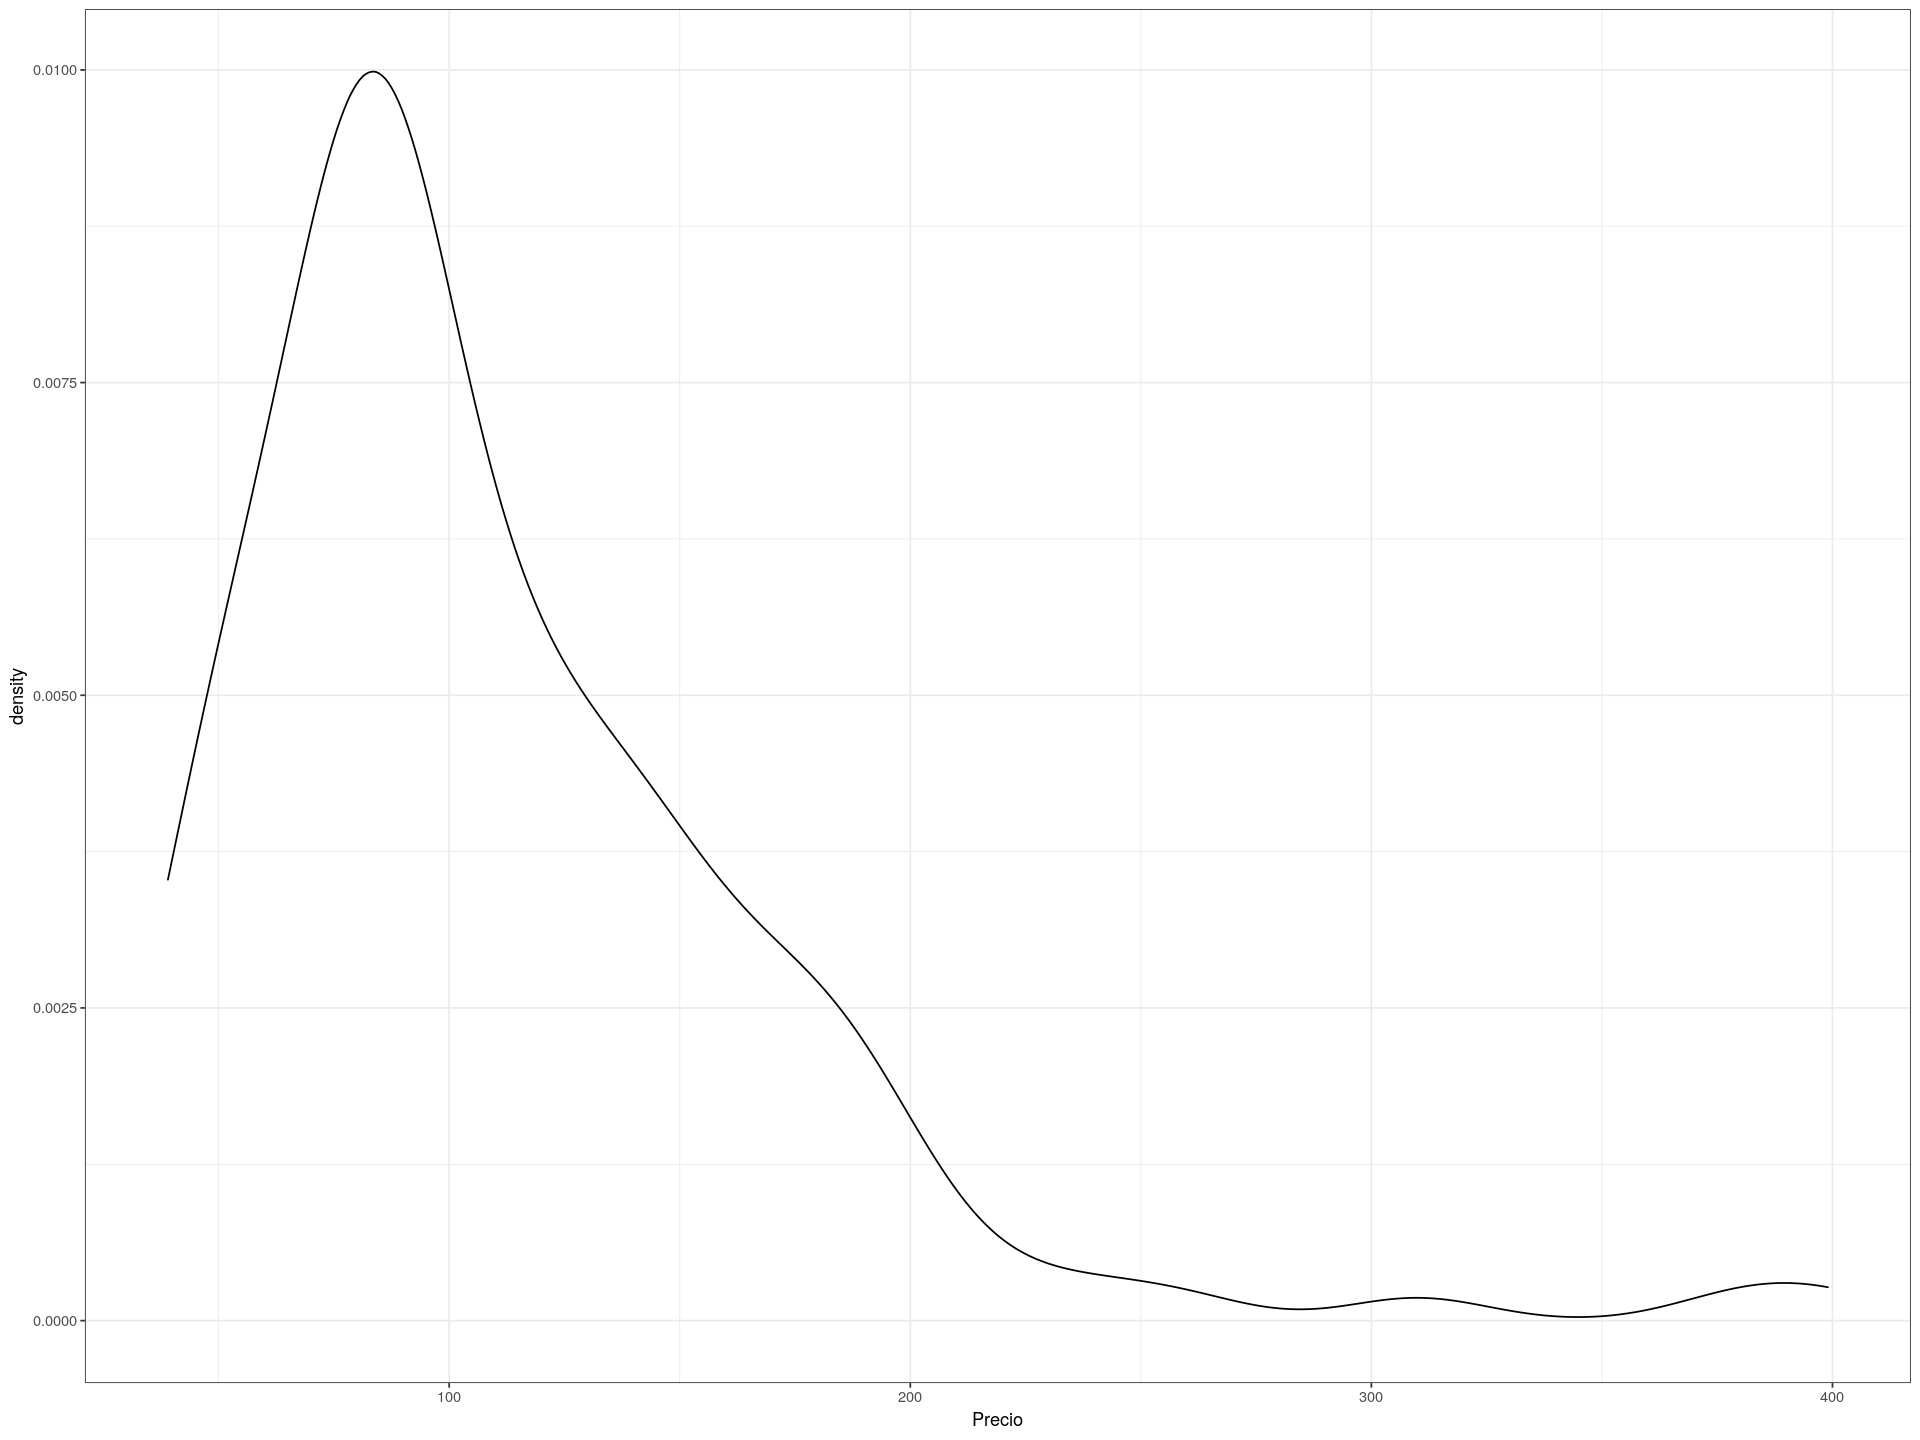

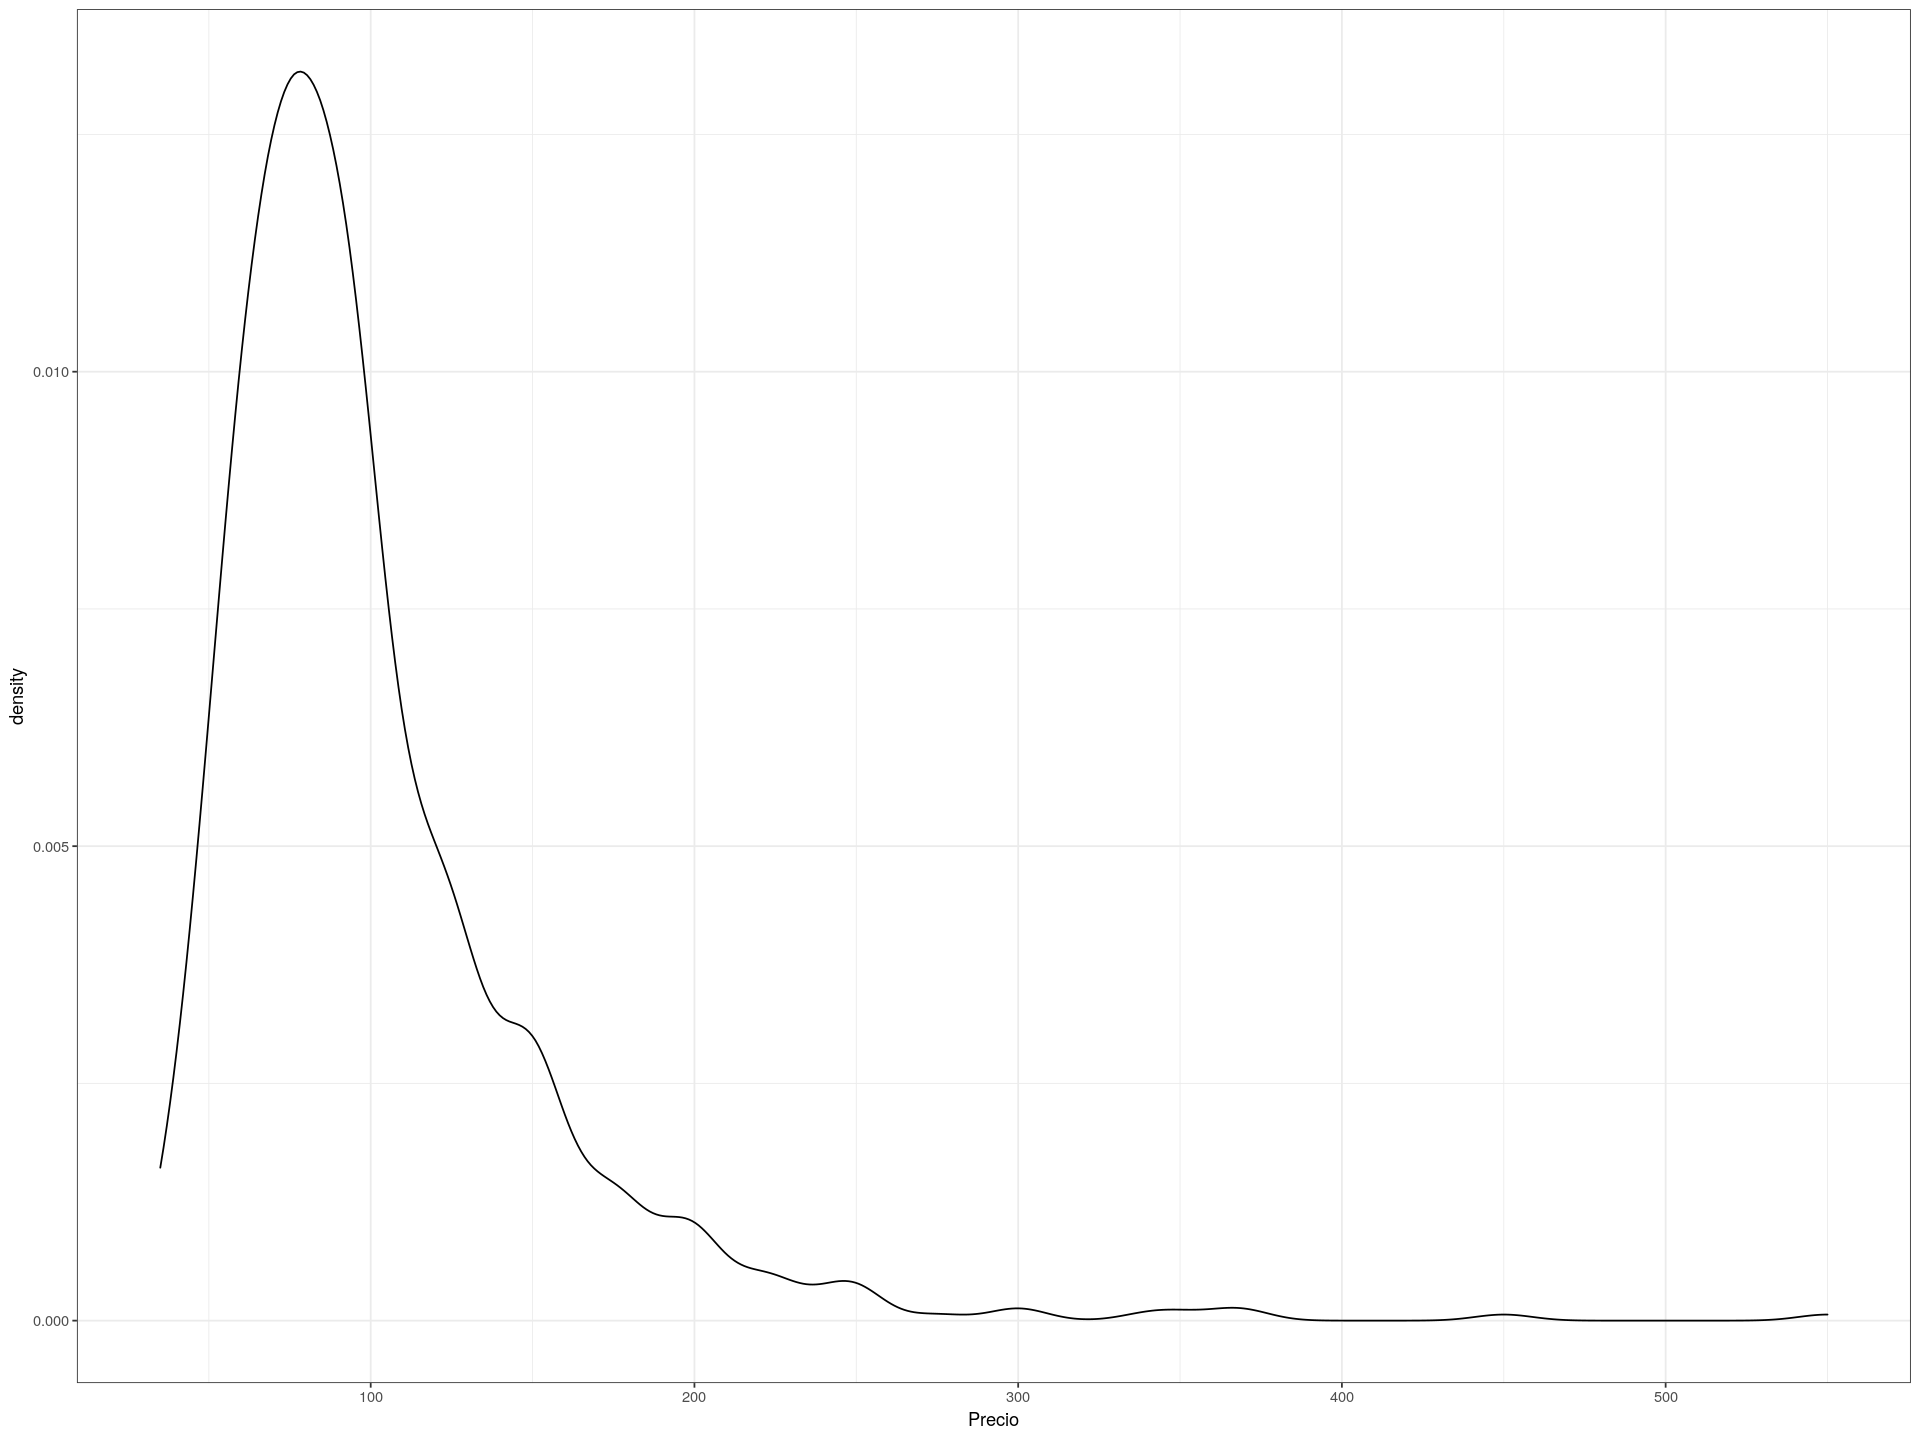

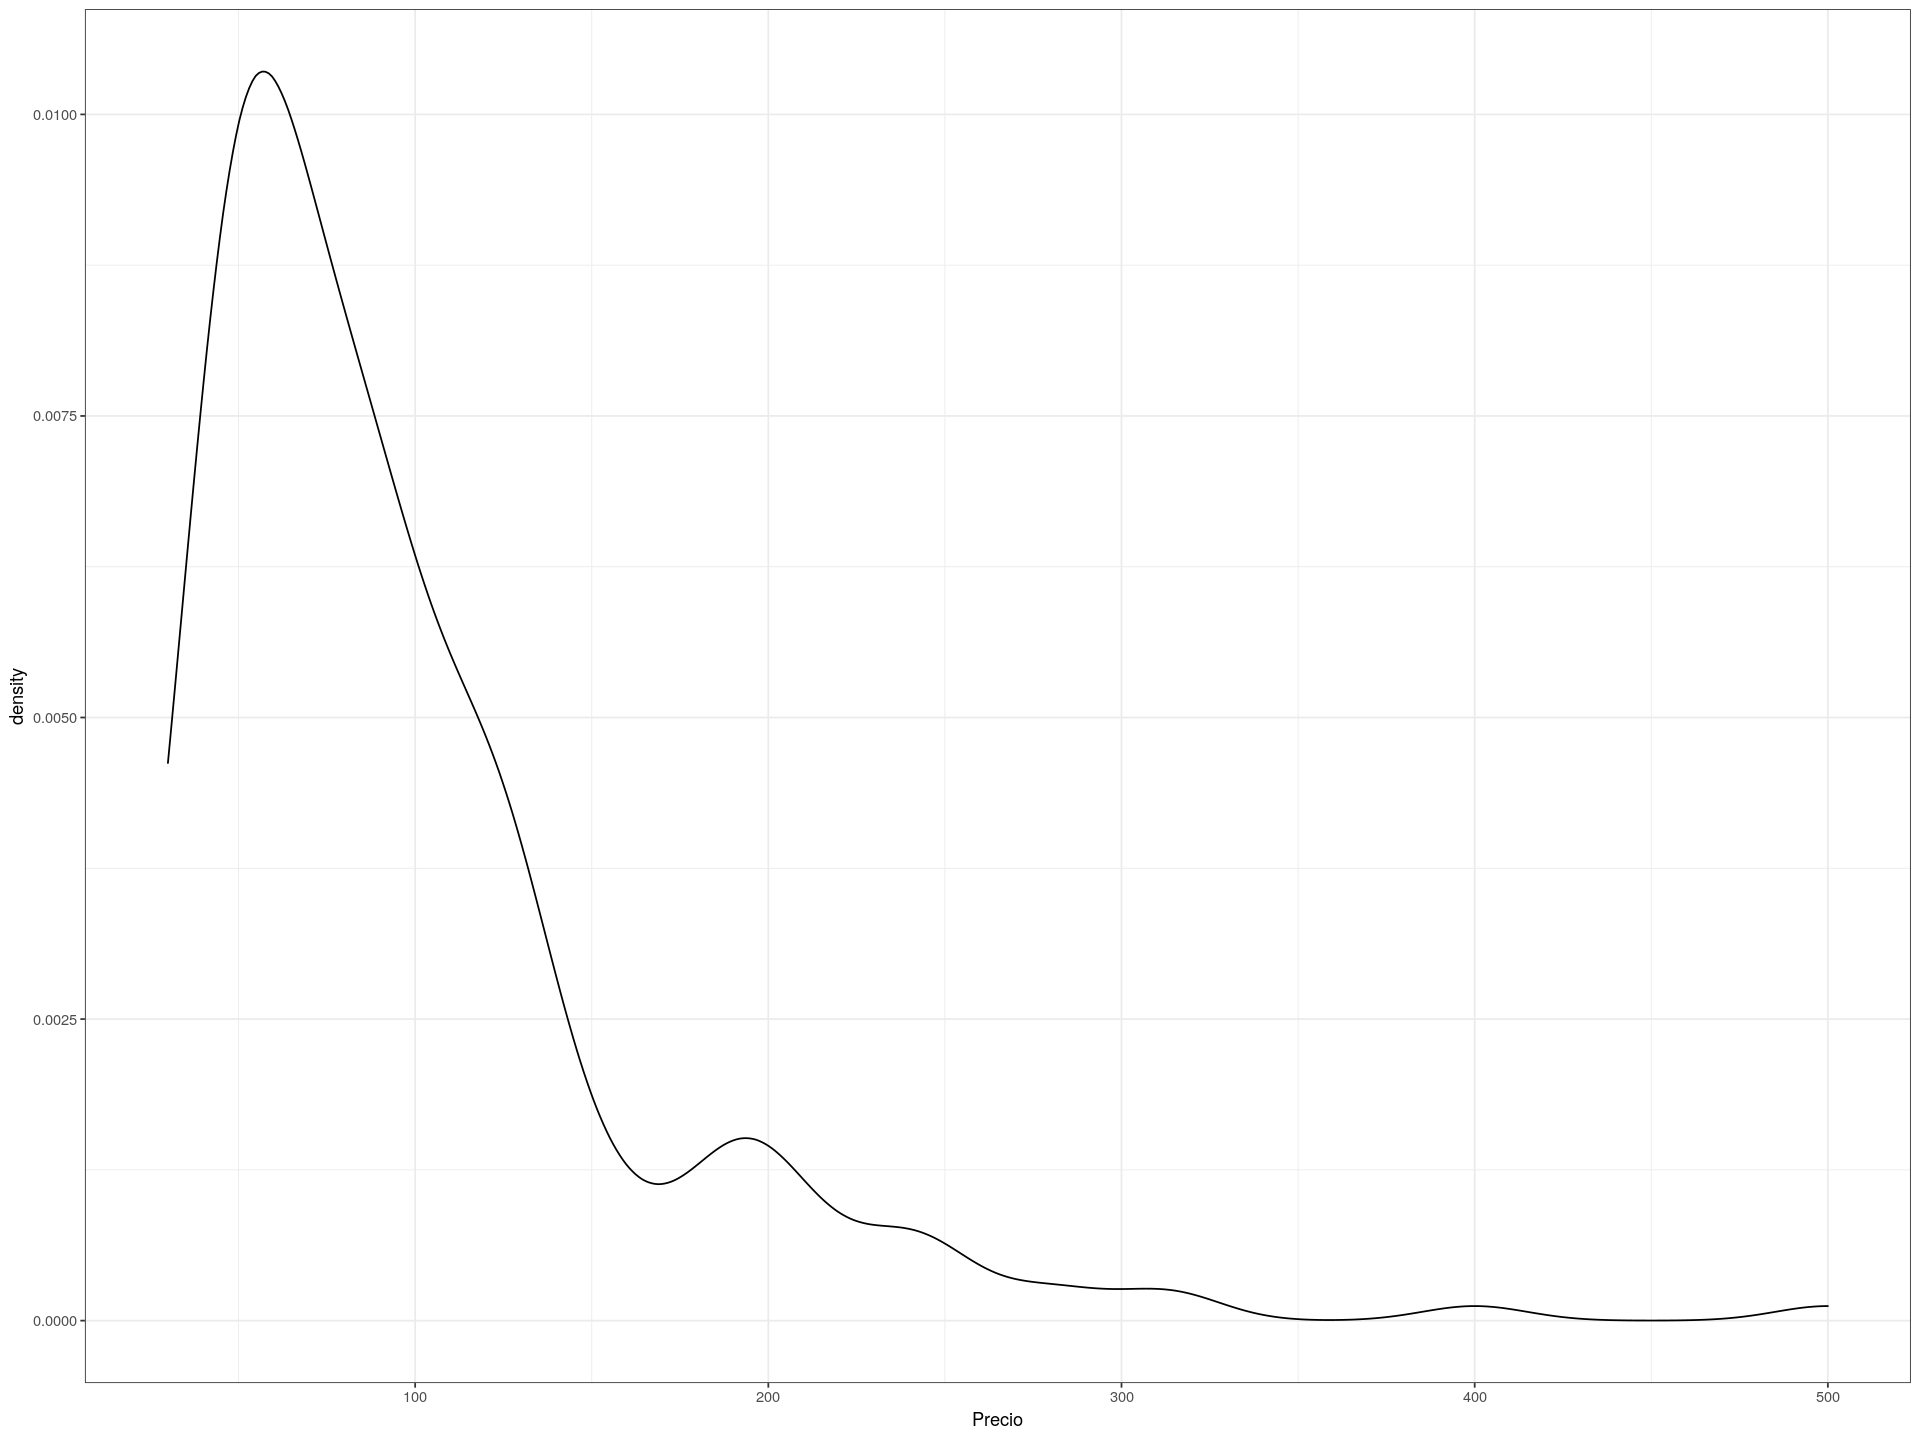

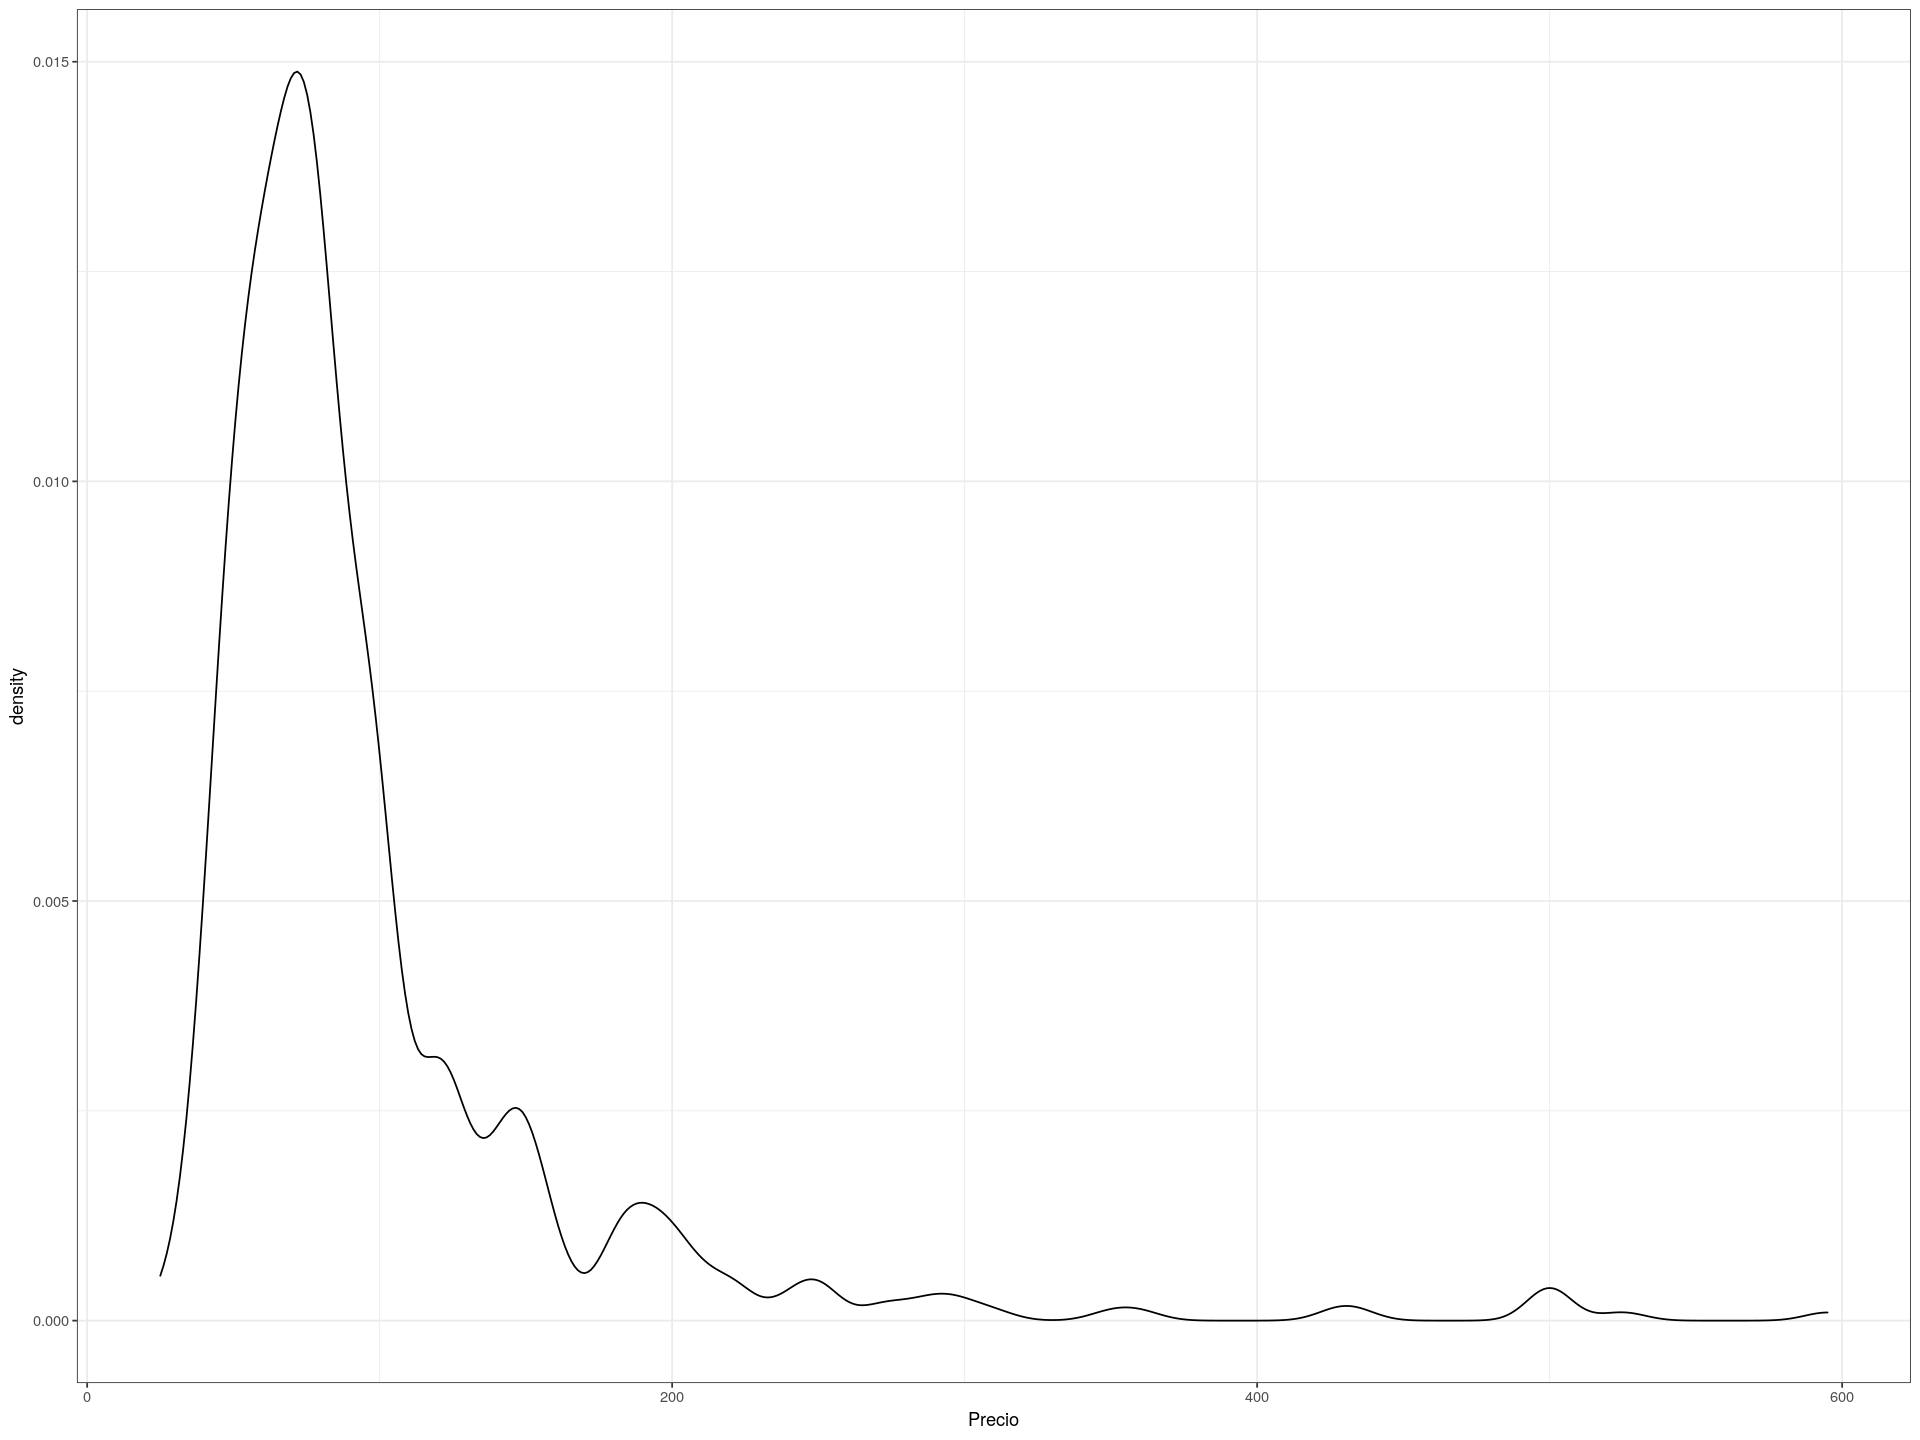

In [55]:
options(repr.plot.height=12,repr.plot.width=16)
ggplot(airbnb_entire[airbnb_entire$Barrio == "Recoletos",], aes(x=Precio))+geom_density()+theme_bw()
ggplot(airbnb_entire[airbnb_entire$Barrio == "Goya",], aes(x=Precio))+geom_density()+theme_bw()
ggplot(airbnb_entire[airbnb_entire$Barrio == "Sol",], aes(x=Precio))+geom_density()+theme_bw()
ggplot(airbnb_entire[airbnb_entire$Barrio == "Trafalgar",], aes(x=Precio))+geom_density()+theme_bw()
ggplot(airbnb_entire[airbnb_entire$Barrio == "Justicia",], aes(x=Precio))+geom_density()+theme_bw()



Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [56]:
abnbBarrioAggMC<-aggregate(MetrosCuadrados~Barrio,airbnb_entire,mean,na.rm=T)
abnbBarrioFreqMC<-merge(abnbBarrioFreq,abnbBarrioAggMC)
abnbBarrioFreqMC[abnbBarrioFreqMC$Barrio == "Recoletos" | abnbBarrioFreqMC$Barrio == "Goya" | abnbBarrioFreqMC$Barrio == "Sol" | abnbBarrioFreqMC$Barrio == "Trafalgar" | abnbBarrioFreqMC$Barrio == "Justicia",]


,Barrio,Precio,Freq,MetrosCuadrados
,<fct>,<dbl>,<int>,<dbl>
28,Goya,111.33803,142,51.68504
31,Justicia,98.25468,534,28.52669
46,Recoletos,161.92537,135,26.66316
52,Sol,100.75036,701,45.61692
53,Trafalgar,98.57848,223,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 139 rows containing non-finite values (stat_density).”
Warning message:
“Removed 517 rows containing non-finite values (stat_density).”


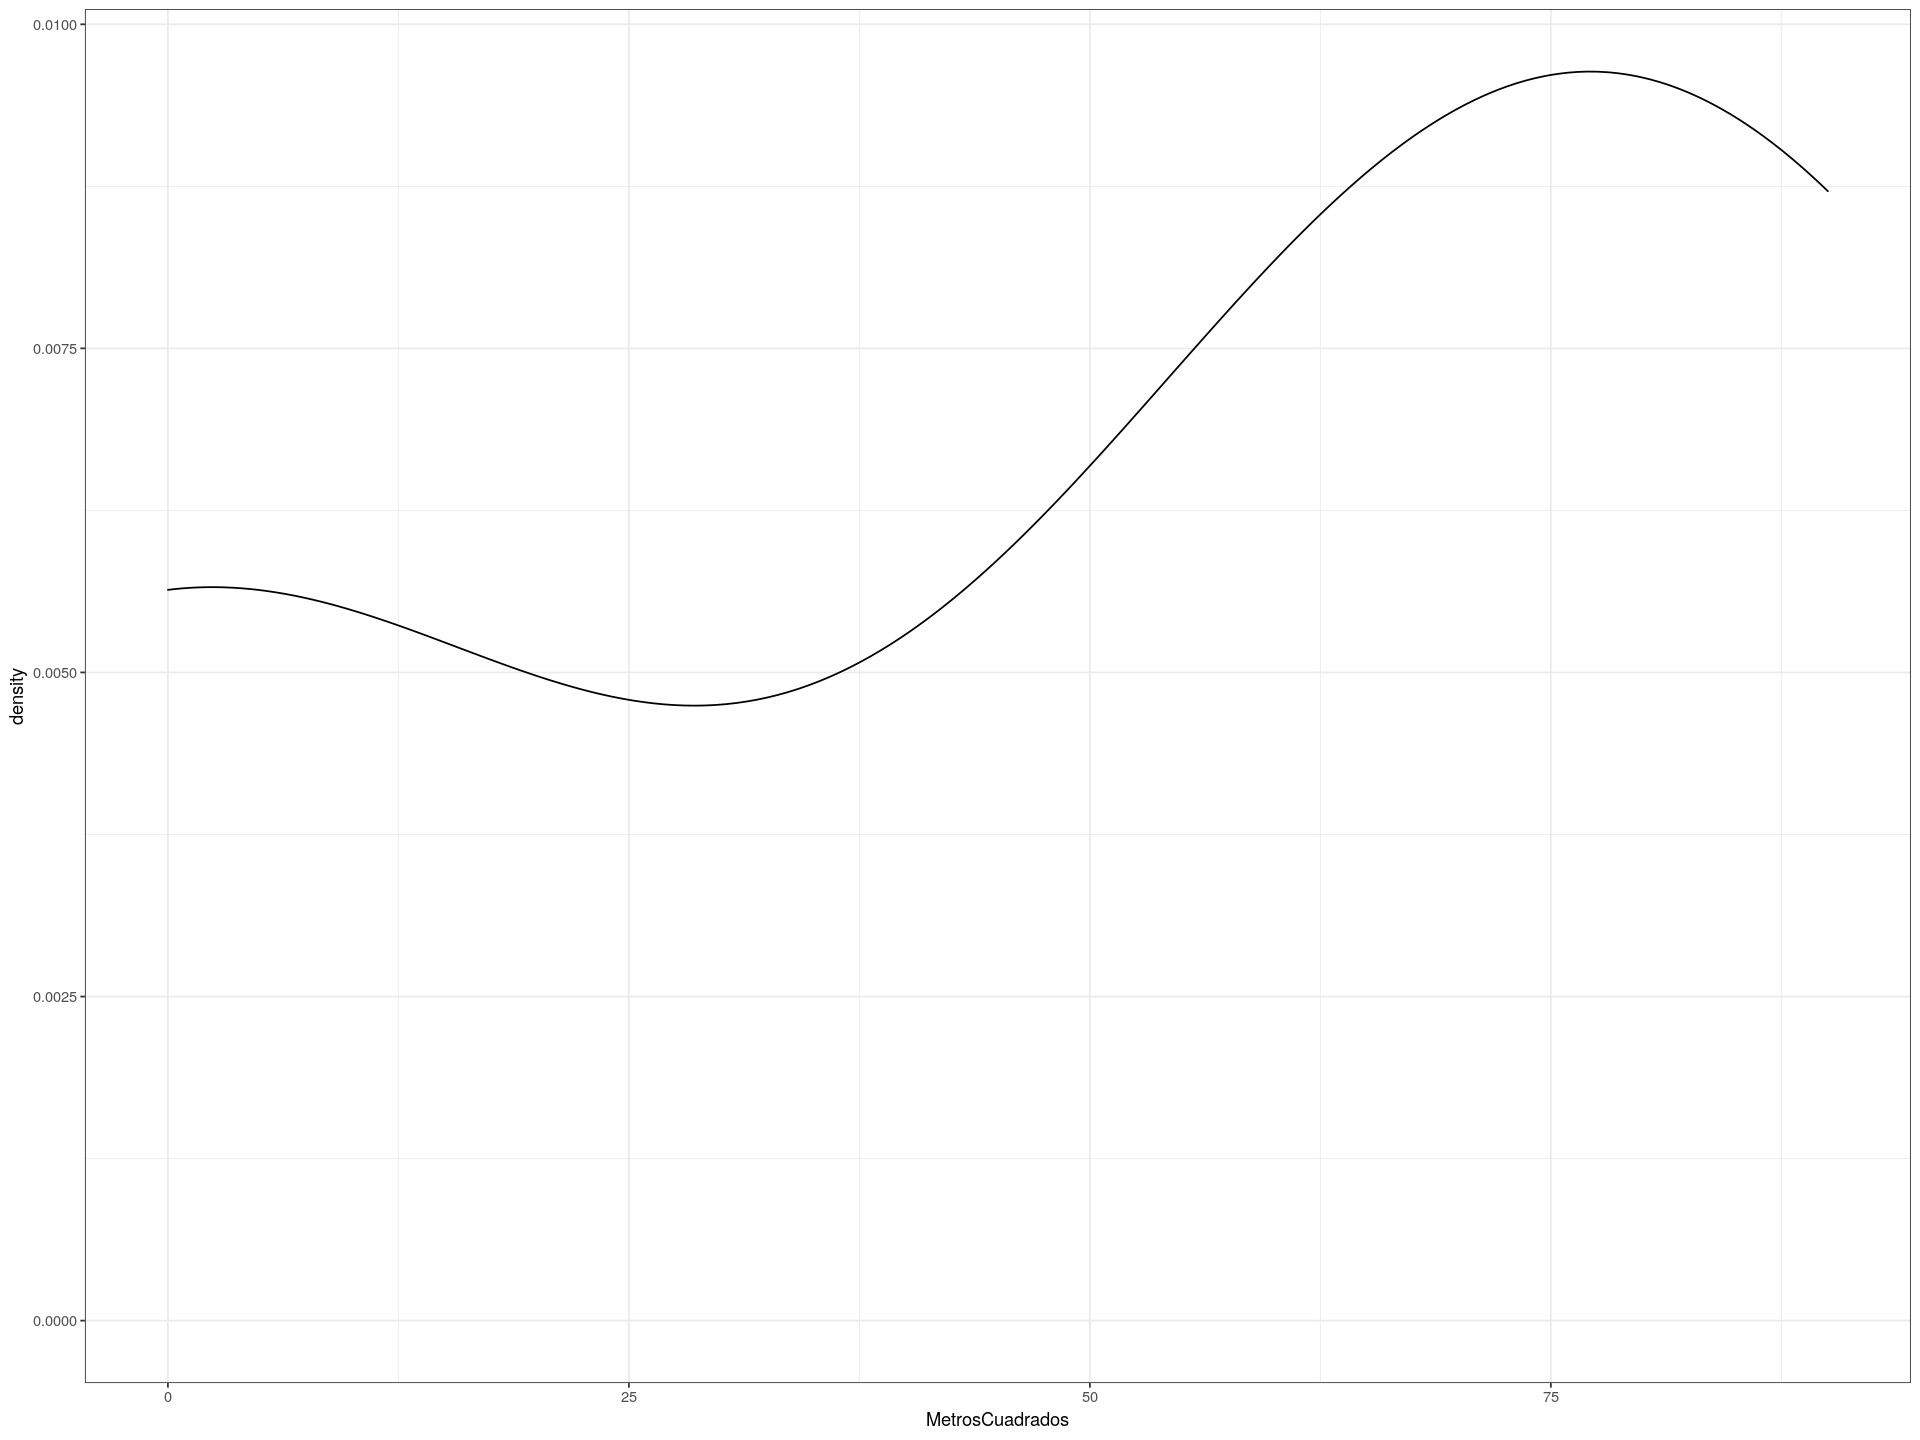

Warning message:
“Removed 132 rows containing non-finite values (stat_density).”


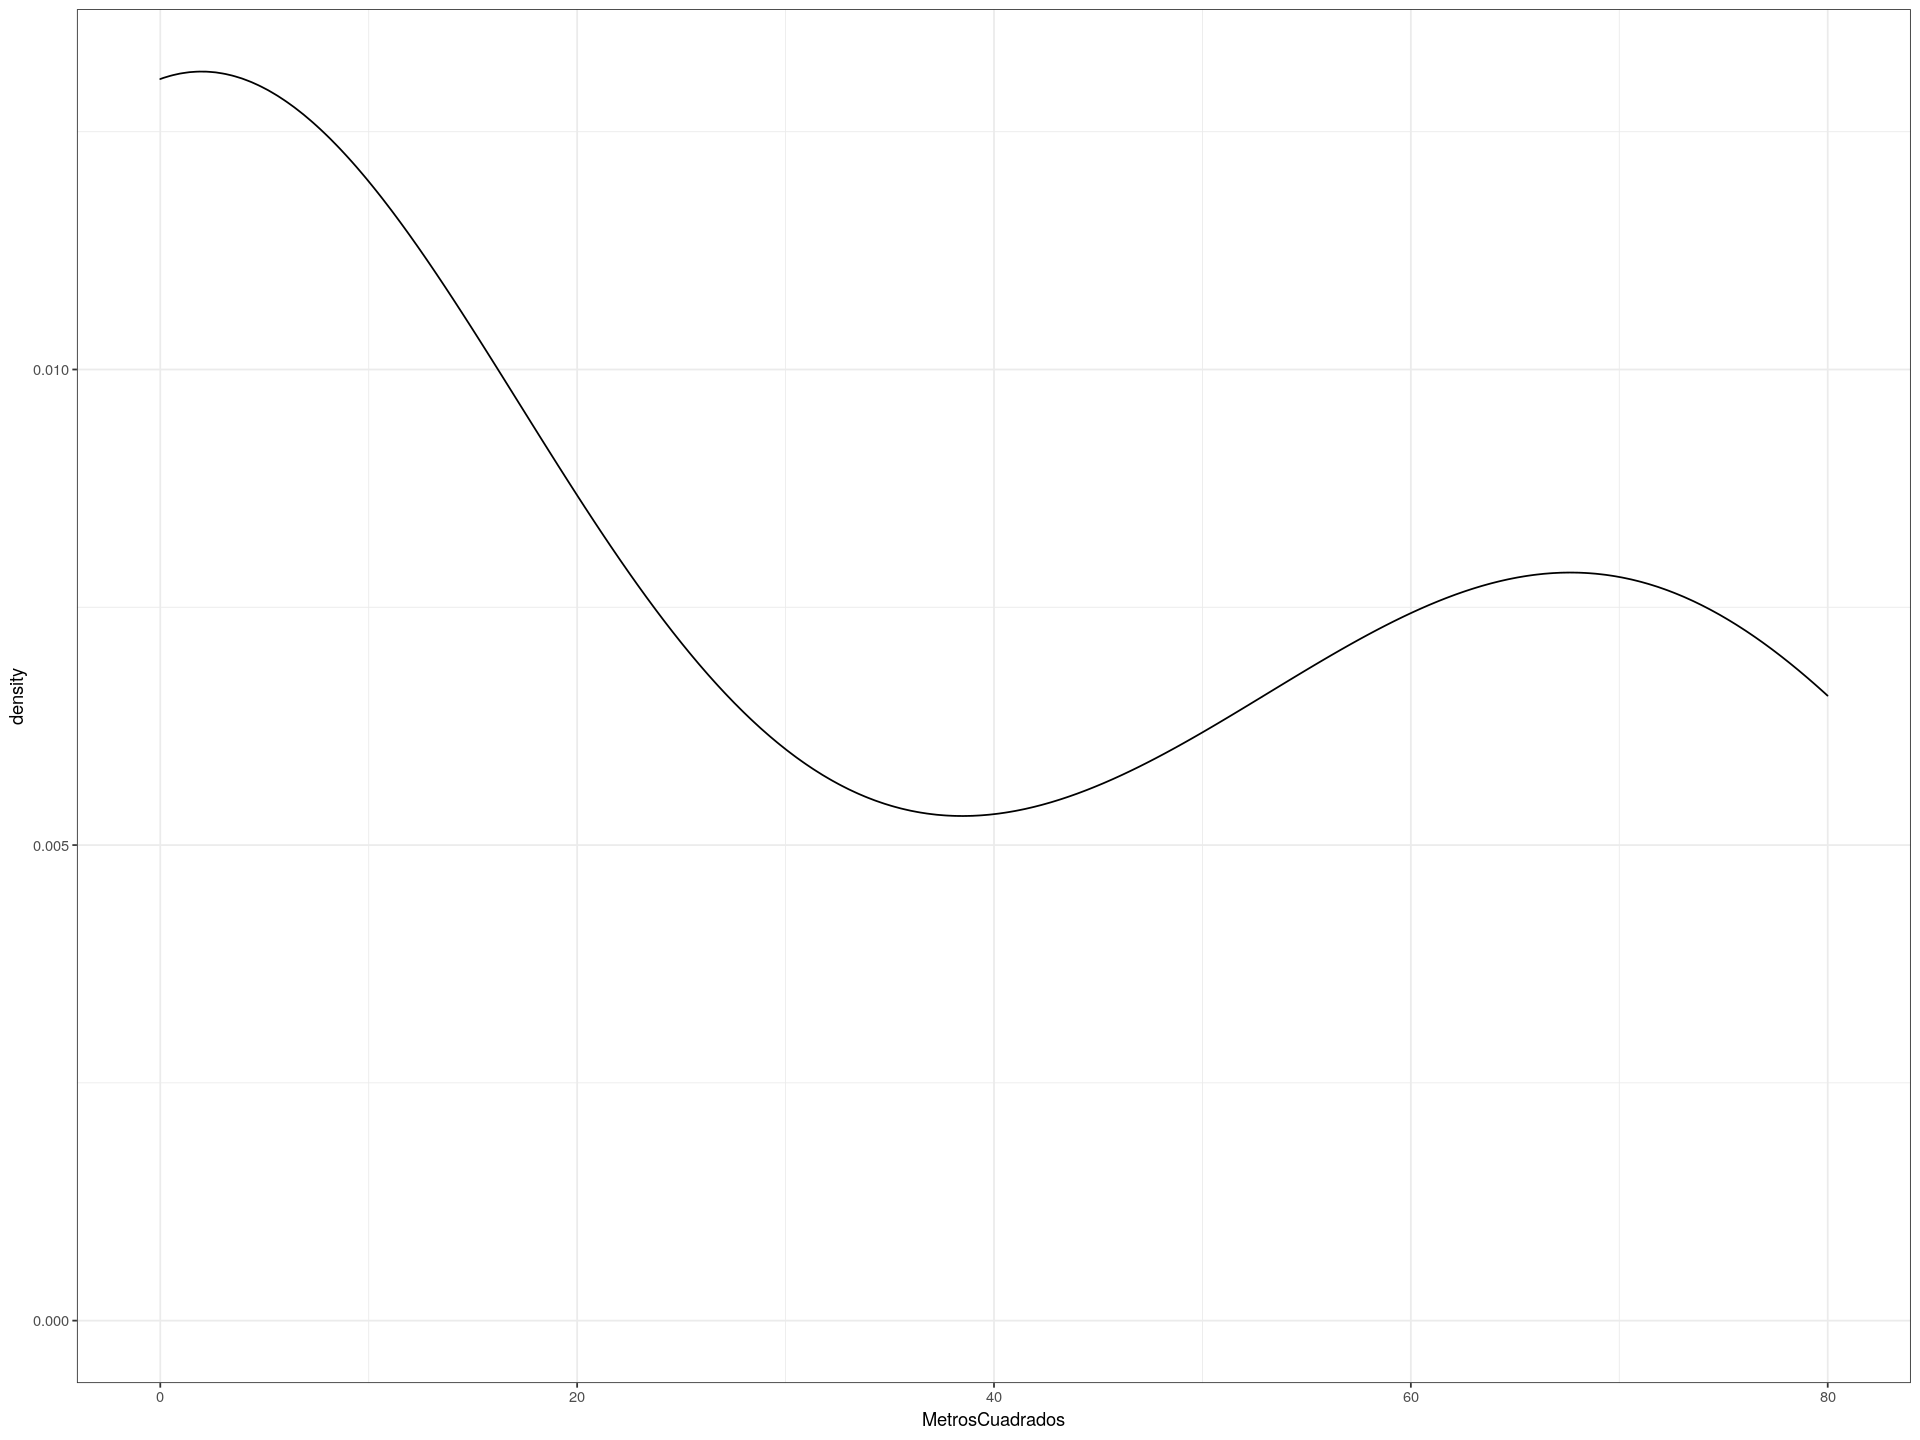

Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


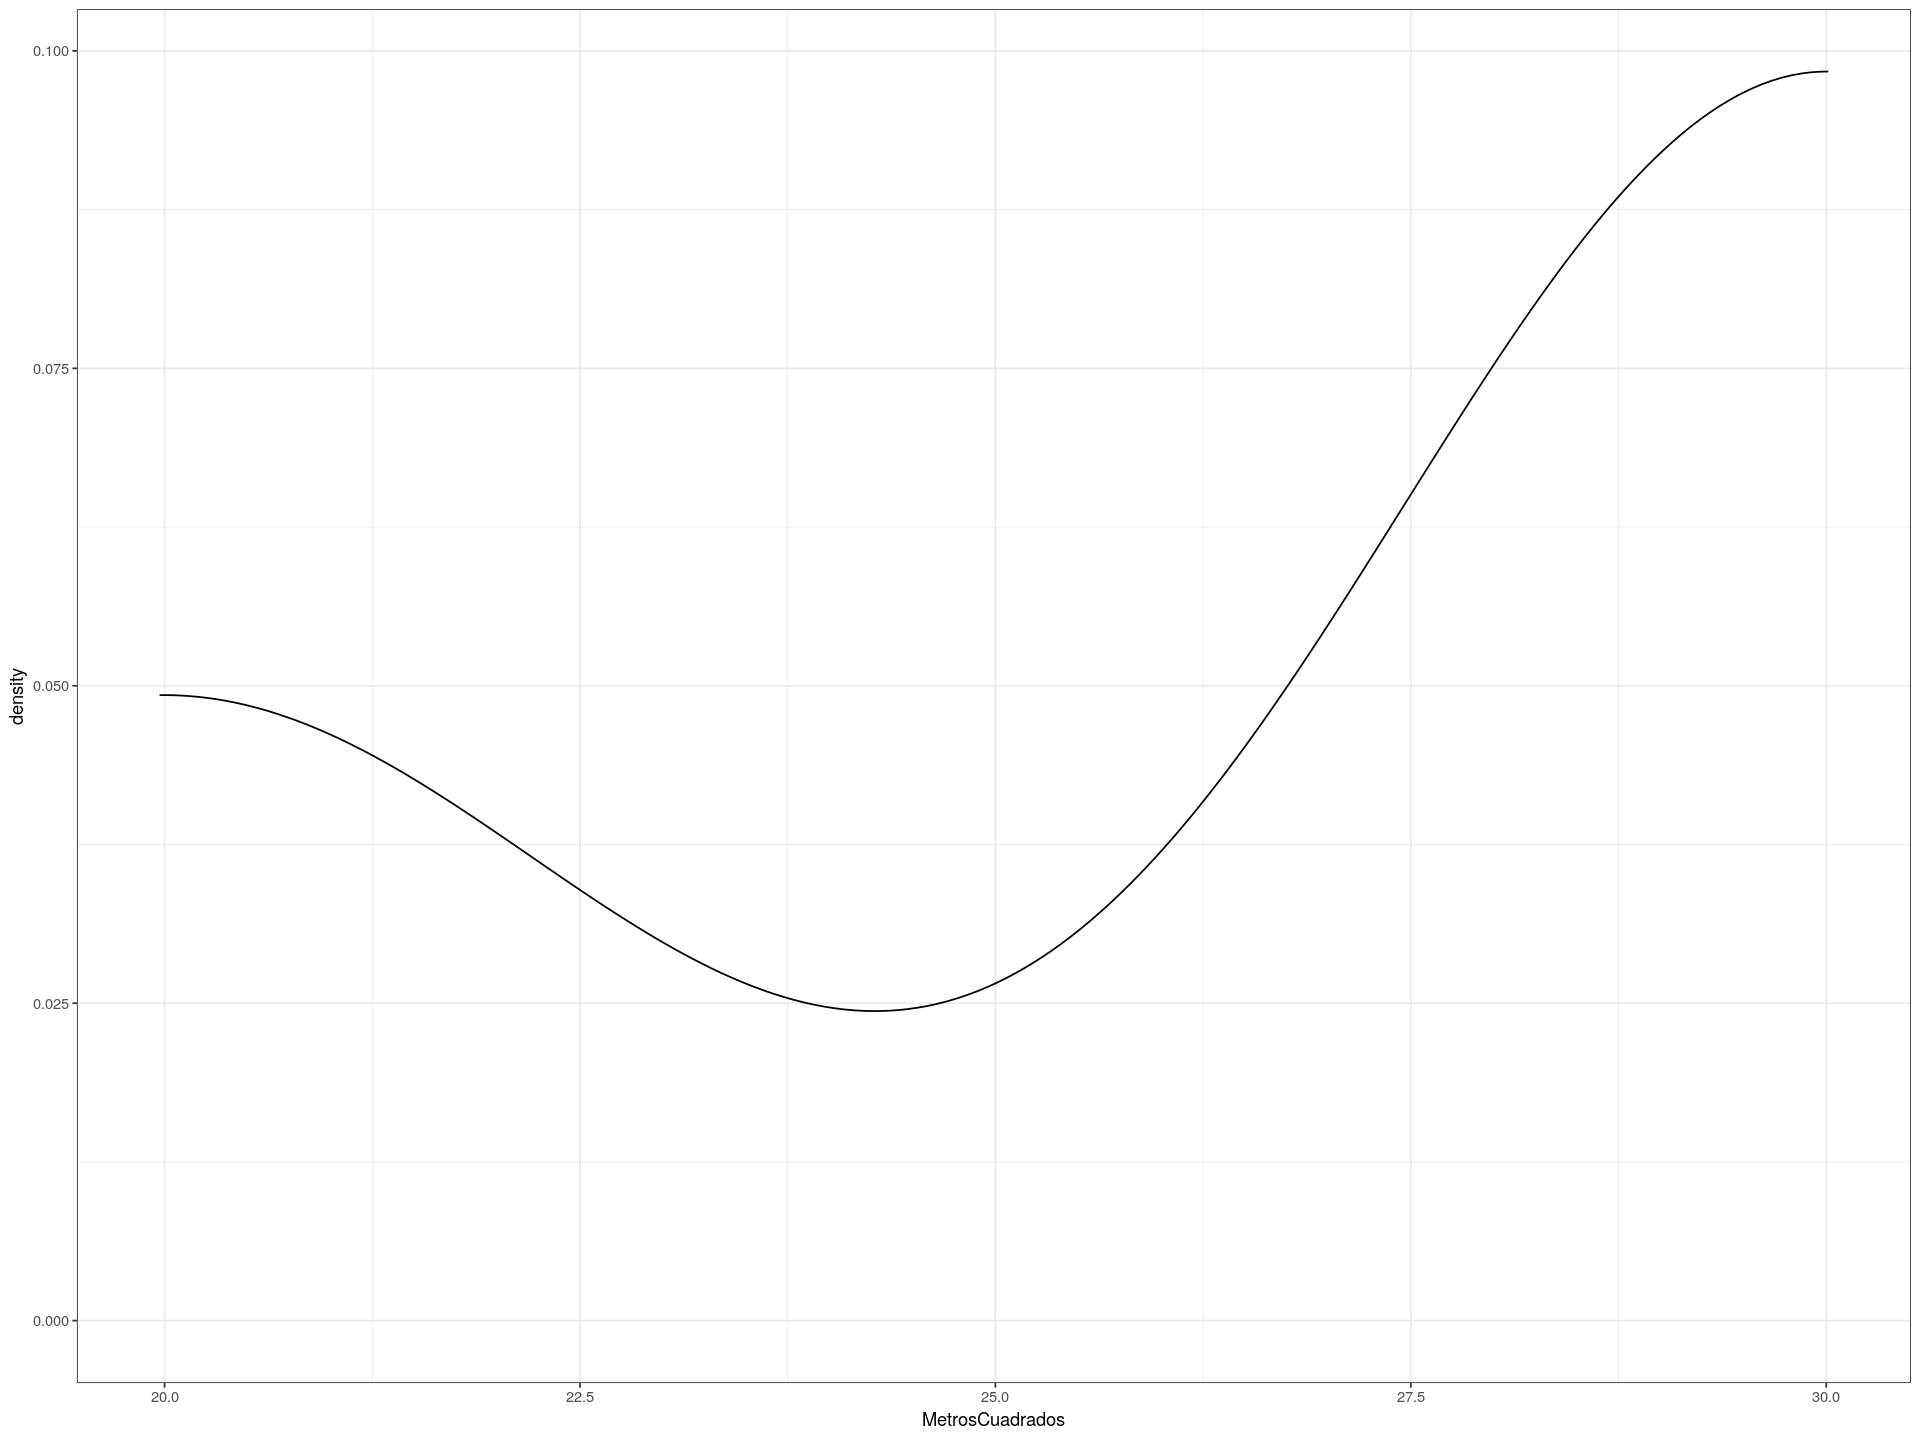

Warning message:
“Removed 216 rows containing non-finite values (stat_density).”


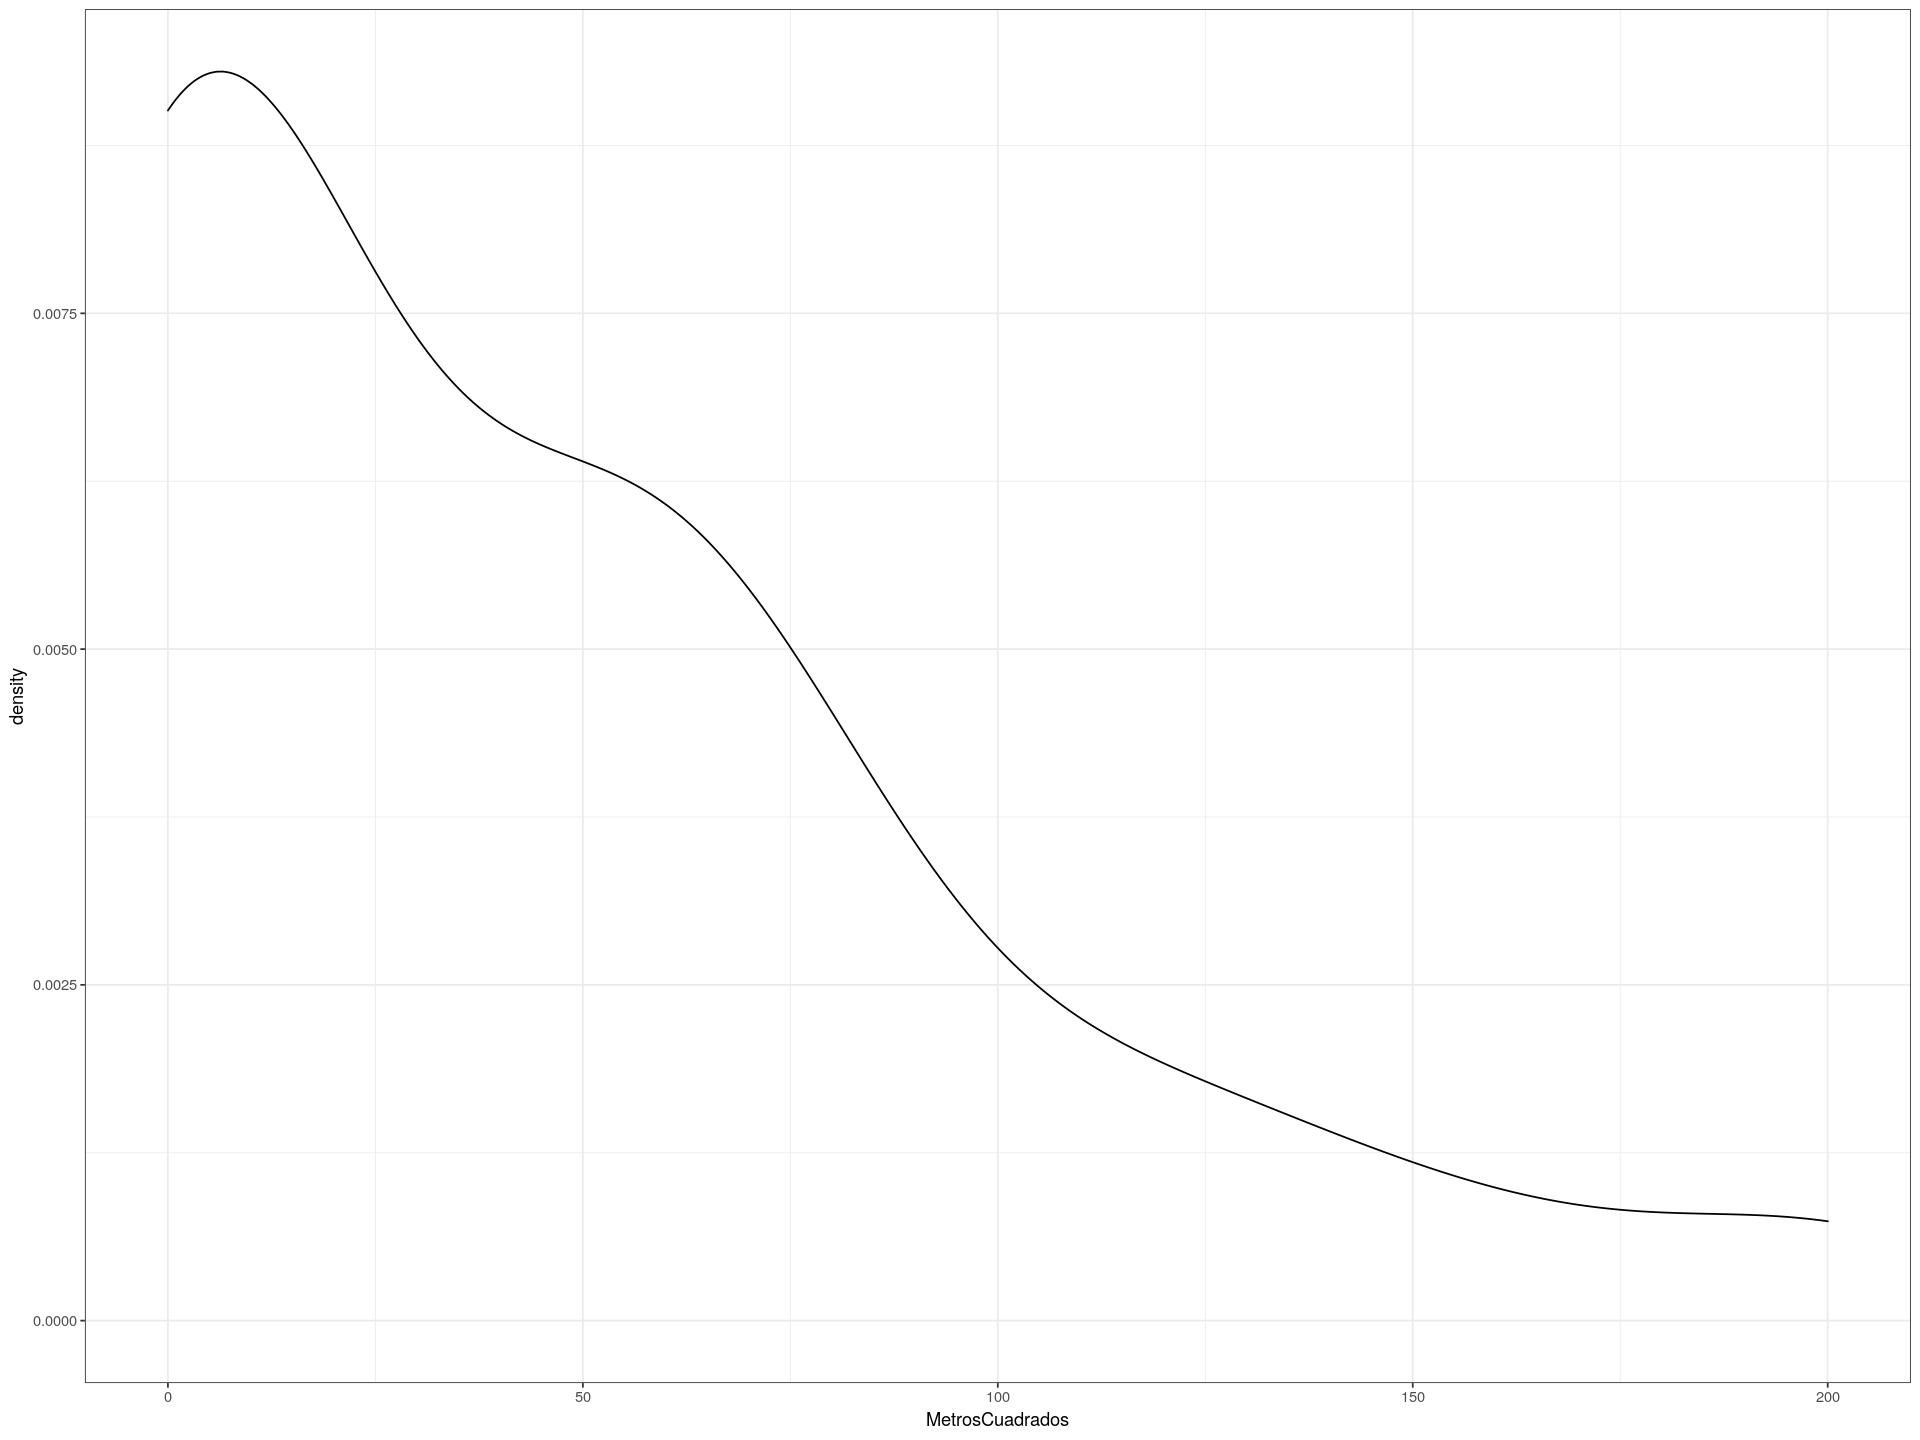

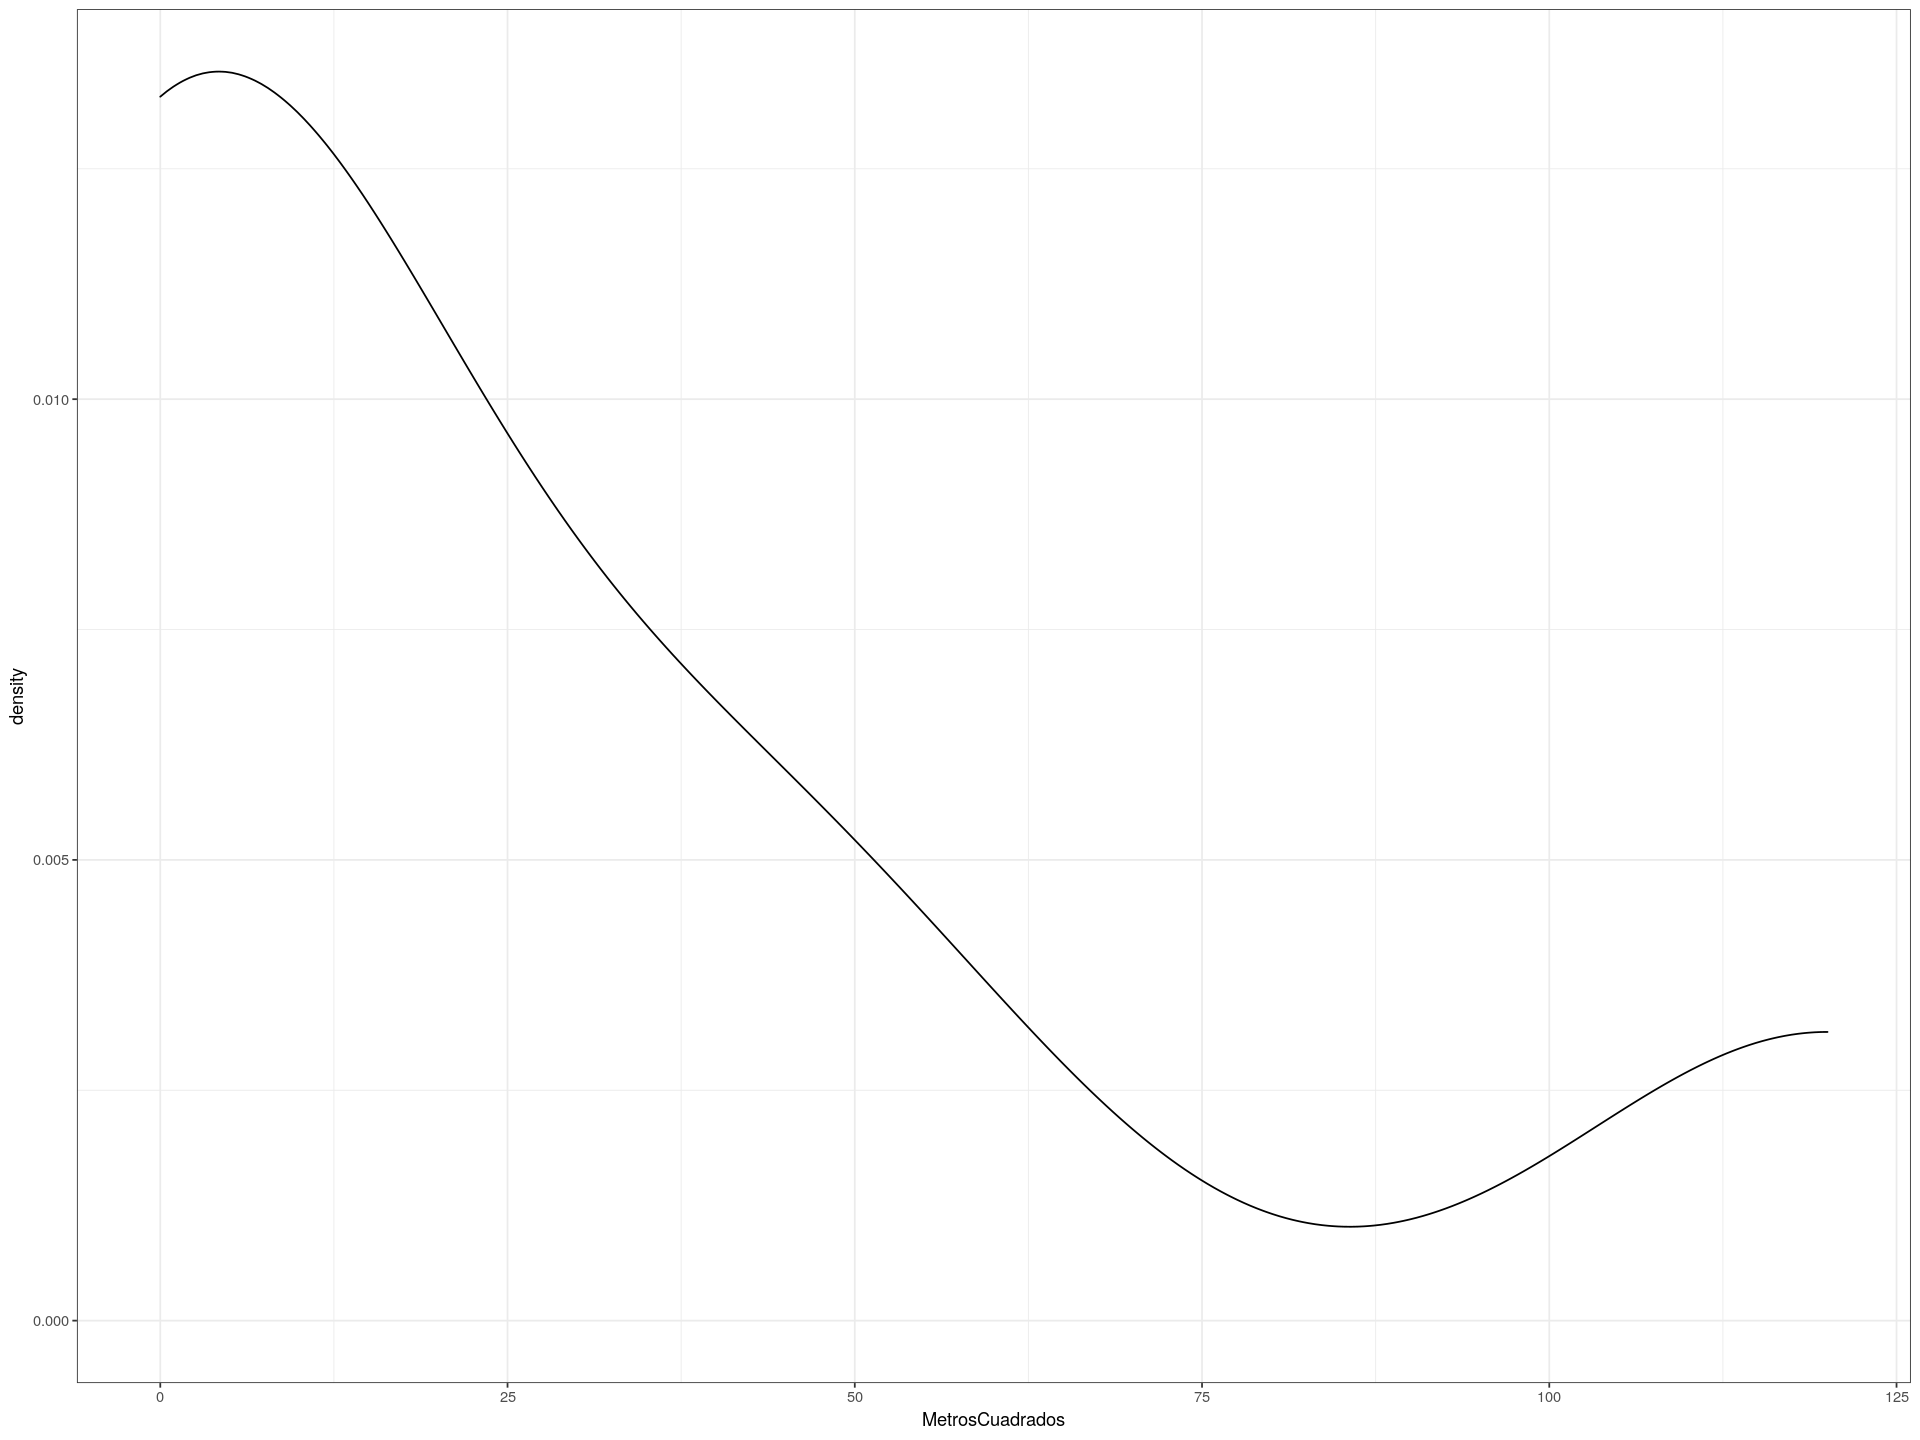

In [57]:
ggplot(airbnb_entire[airbnb_entire$Barrio == "Goya",], aes(x=MetrosCuadrados))+geom_density()+theme_bw()
ggplot(airbnb_entire[airbnb_entire$Barrio == "Justicia",], aes(x=MetrosCuadrados))+geom_density()+theme_bw()
ggplot(airbnb_entire[airbnb_entire$Barrio == "Recoletos",], aes(x=MetrosCuadrados))+geom_density()+theme_bw()
ggplot(airbnb_entire[airbnb_entire$Barrio == "Sol",], aes(x=MetrosCuadrados))+geom_density()+theme_bw()
ggplot(airbnb_entire[airbnb_entire$Barrio == "Trafalgar",], aes(x=MetrosCuadrados))+geom_density()+theme_bw()

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [58]:
#usamos shapiro test para ver si las distribuciones son normales
TR<-airbnb_entire[airbnb_entire$Barrio == "Trafalgar",8]
SO<-airbnb_entire[airbnb_entire$Barrio == "Sol",8]
RE<-airbnb_entire[airbnb_entire$Barrio == "Recoletos",8]
GO<-airbnb_entire[airbnb_entire$Barrio == "Goya",8]
JU<-airbnb_entire[airbnb_entire$Barrio == "Justicia",8]

shapiro.test(TR)
paste("TR no es normal")
shapiro.test(SO)
paste("SO no es normal")
shapiro.test(RE)
paste("RE no es normal")
shapiro.test(GO)
paste("GO es normal")
shapiro.test(JU)
paste("JU no es normal")

#hacer kruskal wallis y no anova, ya que no hay normanlidad en todas las muestras

kruskal.test(list(TR,SO,RE,GO,JU))

#segun los resultando la hipotesis nula no puede ser rechazada y concluimos que las muestra provienen de una misma poblacion.


	Shapiro-Wilk normality test

data:  TR
W = 0.75023, p-value = 0.01276


[1] "TR no es normal"


	Shapiro-Wilk normality test

data:  SO
W = 0.83089, p-value = 8.691e-07


[1] "SO no es normal"


	Shapiro-Wilk normality test

data:  RE
W = 0.75, p-value < 2.2e-16


[1] "RE no es normal"


	Shapiro-Wilk normality test

data:  GO
W = 0.93813, p-value = 0.5199


[1] "GO es normal"


	Shapiro-Wilk normality test

data:  JU
W = 0.76212, p-value = 0.0006419


[1] "JU no es normal"


	Kruskal-Wallis rank sum test

data:  list(TR, SO, RE, GO, JU)
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [59]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
barrio_sol<-droplevels(barrio_sol)
str(barrio_sol)
summary(barrio_sol[,c(4,5,6,8)])


'data.frame':	701 obs. of  8 variables:
 $ CodigoPostal   : Factor w/ 10 levels "20013","28001",..: 6 6 6 5 6 6 4 6 5 5 ...
 $ Barrio         : Factor w/ 1 level "Sol": 1 1 1 1 1 1 1 1 1 1 ...
 $ TipoAlquiler   : Factor w/ 1 level "Entire home/apt": 1 1 1 1 1 1 1 1 1 1 ...
 $ MaxOcupantes   : int  4 6 4 6 4 4 10 6 4 4 ...
 $ NumBanyos      : num  1 1 1 1 1 1 2 1 1 1 ...
 $ NumDormitorios : int  1 2 1 2 1 1 4 2 1 1 ...
 $ Precio         : int  75 130 100 160 49 70 210 120 50 100 ...
 $ MetrosCuadrados: num  60 NA NA NA NA ...


  MaxOcupantes      NumBanyos     NumDormitorios   MetrosCuadrados 
 Min.   : 1.000   Min.   :1.000   Min.   : 0.000   Min.   :  0.00  
 1st Qu.: 4.000   1st Qu.:1.000   1st Qu.: 1.000   1st Qu.:  0.00  
 Median : 4.000   Median :1.000   Median : 1.000   Median : 37.49  
 Mean   : 4.642   Mean   :1.272   Mean   : 1.444   Mean   : 45.62  
 3rd Qu.: 6.000   3rd Qu.:1.500   3rd Qu.: 2.000   3rd Qu.: 69.96  
 Max.   :16.000   Max.   :6.000   Max.   :10.000   Max.   :200.02  
                                                   NA's   :641     

In [60]:
#creo que este modelo puede ser el mas logico de construir a priori
model<-lm(barrio_sol$MaxOcupantes ~ barrio_sol$NumDormitorios)
summary(model)


Call:
lm(formula = barrio_sol$MaxOcupantes ~ barrio_sol$NumDormitorios)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6052 -0.9541  0.0459  0.4955  7.3948 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2.40373    0.08842   27.19   <2e-16 ***
barrio_sol$NumDormitorios  1.55038    0.05023   30.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.339 on 699 degrees of freedom
Multiple R-squared:  0.5768,	Adjusted R-squared:  0.5762 
F-statistic: 952.6 on 1 and 699 DF,  p-value: < 2.2e-16


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [61]:
cor(barrio_sol[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")], use = "pairwise.complete.obs")

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.4820549
NumDormitorios,0.6761906,1.0000000,0.7594598,0.5684521
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.4286233
MetrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


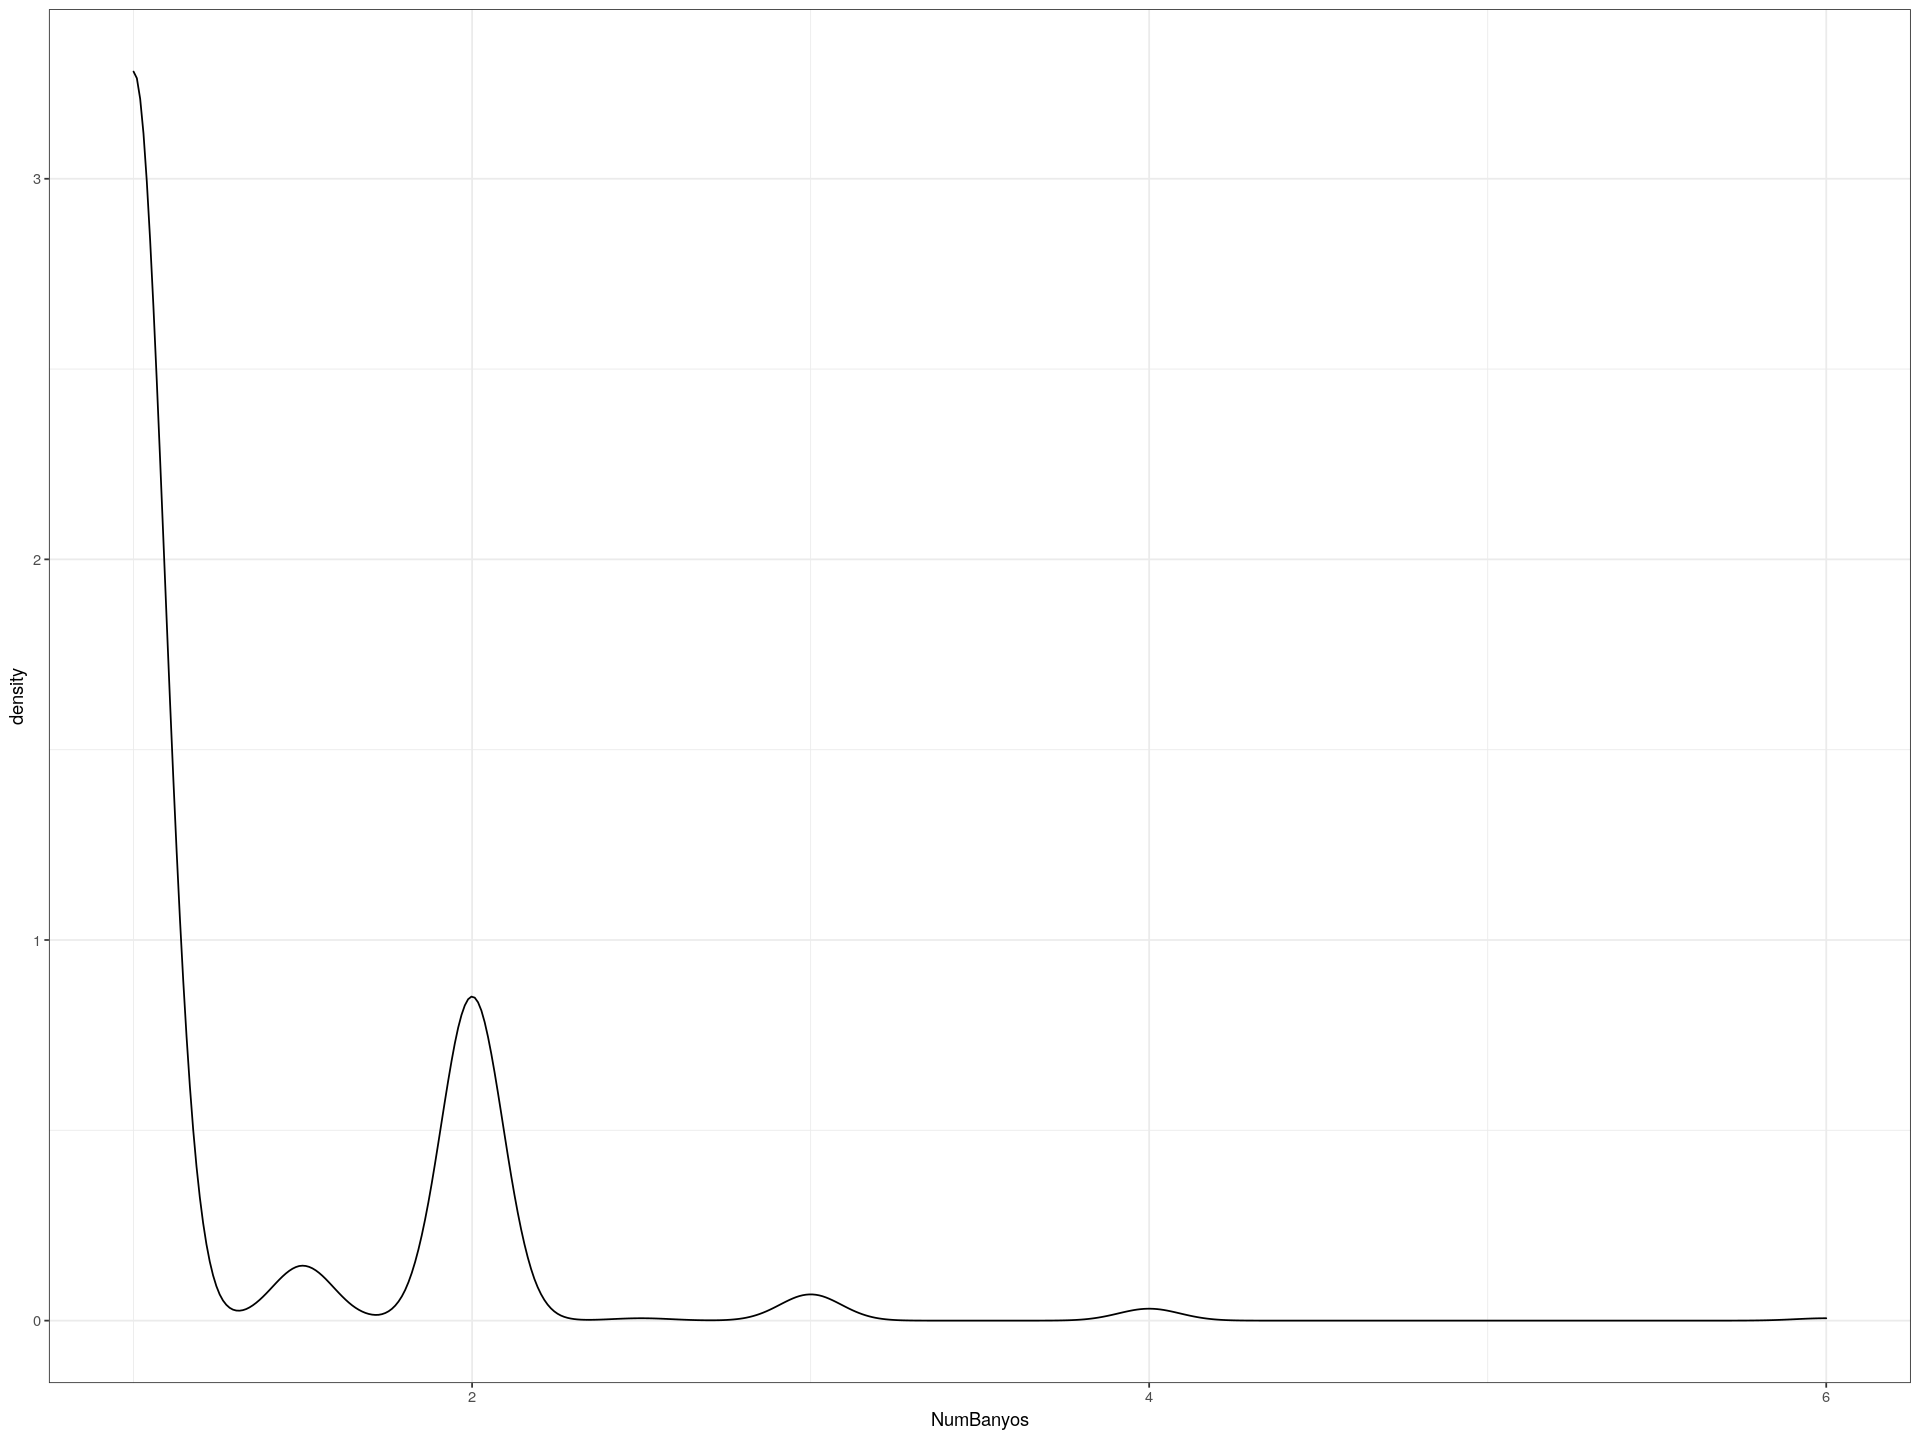

[1] 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 2.0 2.0 1.0 1.0 2.0 1.0 1.0
 [19] 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 4.0 2.0 1.0 1.0 2.0 2.0 1.0 1.0 1.0 2.0
 [37] 1.0 1.0 2.5 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 3.0 1.5 1.5 1.0 1.0 2.0 1.0
 [55] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 2.0 1.0 1.0
 [73] 3.0 1.5 1.0 1.0 1.0 2.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0
 [91] 2.0 1.0 1.0 2.0 1.0 1.0 1.0 2.0 1.0 6.0 2.0 1.0 1.0 1.0 1.5 1.0 1.0 1.0
[109] 1.0 1.0 1.0 1.0 2.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 2.0 1.0
[127] 1.0 2.0 2.0 2.0 1.0 2.0 1.0 1.0 2.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
[145] 1.0 2.0 1.0 2.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.5 1.0 2.0 1.5 1.0 2.0
[163] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0
[181] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.5 1.0 3.0 1.0 1.0 2.0 1.0 1.0 1.0
[199] 1.0 2.0 1.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 2.0 1.0 2.0 1.0
[217] 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.5 2.0 1.0 1.0 1.0 1.0 1.0
[235] 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0
[253] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
[271] 2.0 1.0 2.0 1.5 2.0 1.0 2.0 1.5 2.0 1.0 2.0 1.0 2.0 2.0 2.0 1.0 1.0 1.0
[289] 2.0 1.0 1.0 3.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.5 1.5
[307] 1.0 2.0 2.0 1.5 1.0 4.0 1.0 1.0 2.0 1.0 2.0 2.0 2.0 1.0 1.0 1.0 1.0 2.0
[325] 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.5 2.0 1.0 1.0 1.0
[343] 2.0 1.0 3.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 2.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0
[361] 1.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 2.0 1.0 1.0
[379] 1.0 1.0 2.0 1.5 2.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.5 1.0
[397] 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0
[415] 2.0 2.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0
[433] 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.5 1.0 3.0 3.0
[451] 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 4.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0
[469] 1.0 1.0 2.0 2.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0
[487] 1.0 1.0 1.0 2.0 1.0 1.0 1.0 4.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
[505] 1.0 3.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
[523] 1.0 1.0 1.0 1.0 2.0 2.0 1.0 2.0 1.0 1.0 1.0 4.0 1.0 1.5 1.0 2.0 1.0 1.0
[541] 1.0 1.0 2.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0
[559] 1.0 1.0 1.0 2.0 1.0 1.0 1.0 2.0 2.0 2.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0
[577] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 1.0 1.0 1.0 1.0 1.0
[595] 1.0 1.0 1.0 1.0 1.0 2.0 2.0 2.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 1.0 1.0
[613] 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 2.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0
[631] 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.5 2.0 1.0
[649] 1.0 2.0 1.0 2.0 1.0 1.0 1.5 1.0 1.0 2.0 1.5 1.0 2.0 1.0 2.0 1.0 1.0 2.0
[667] 1.0 1.0 2.0 1.0 1.0 1.0 1.5 1.0 2.0 1.0 1.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0
[685] 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 2.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0

1 1.5   2 2.5   3   4   6 
524  23 136   1  11   5   1

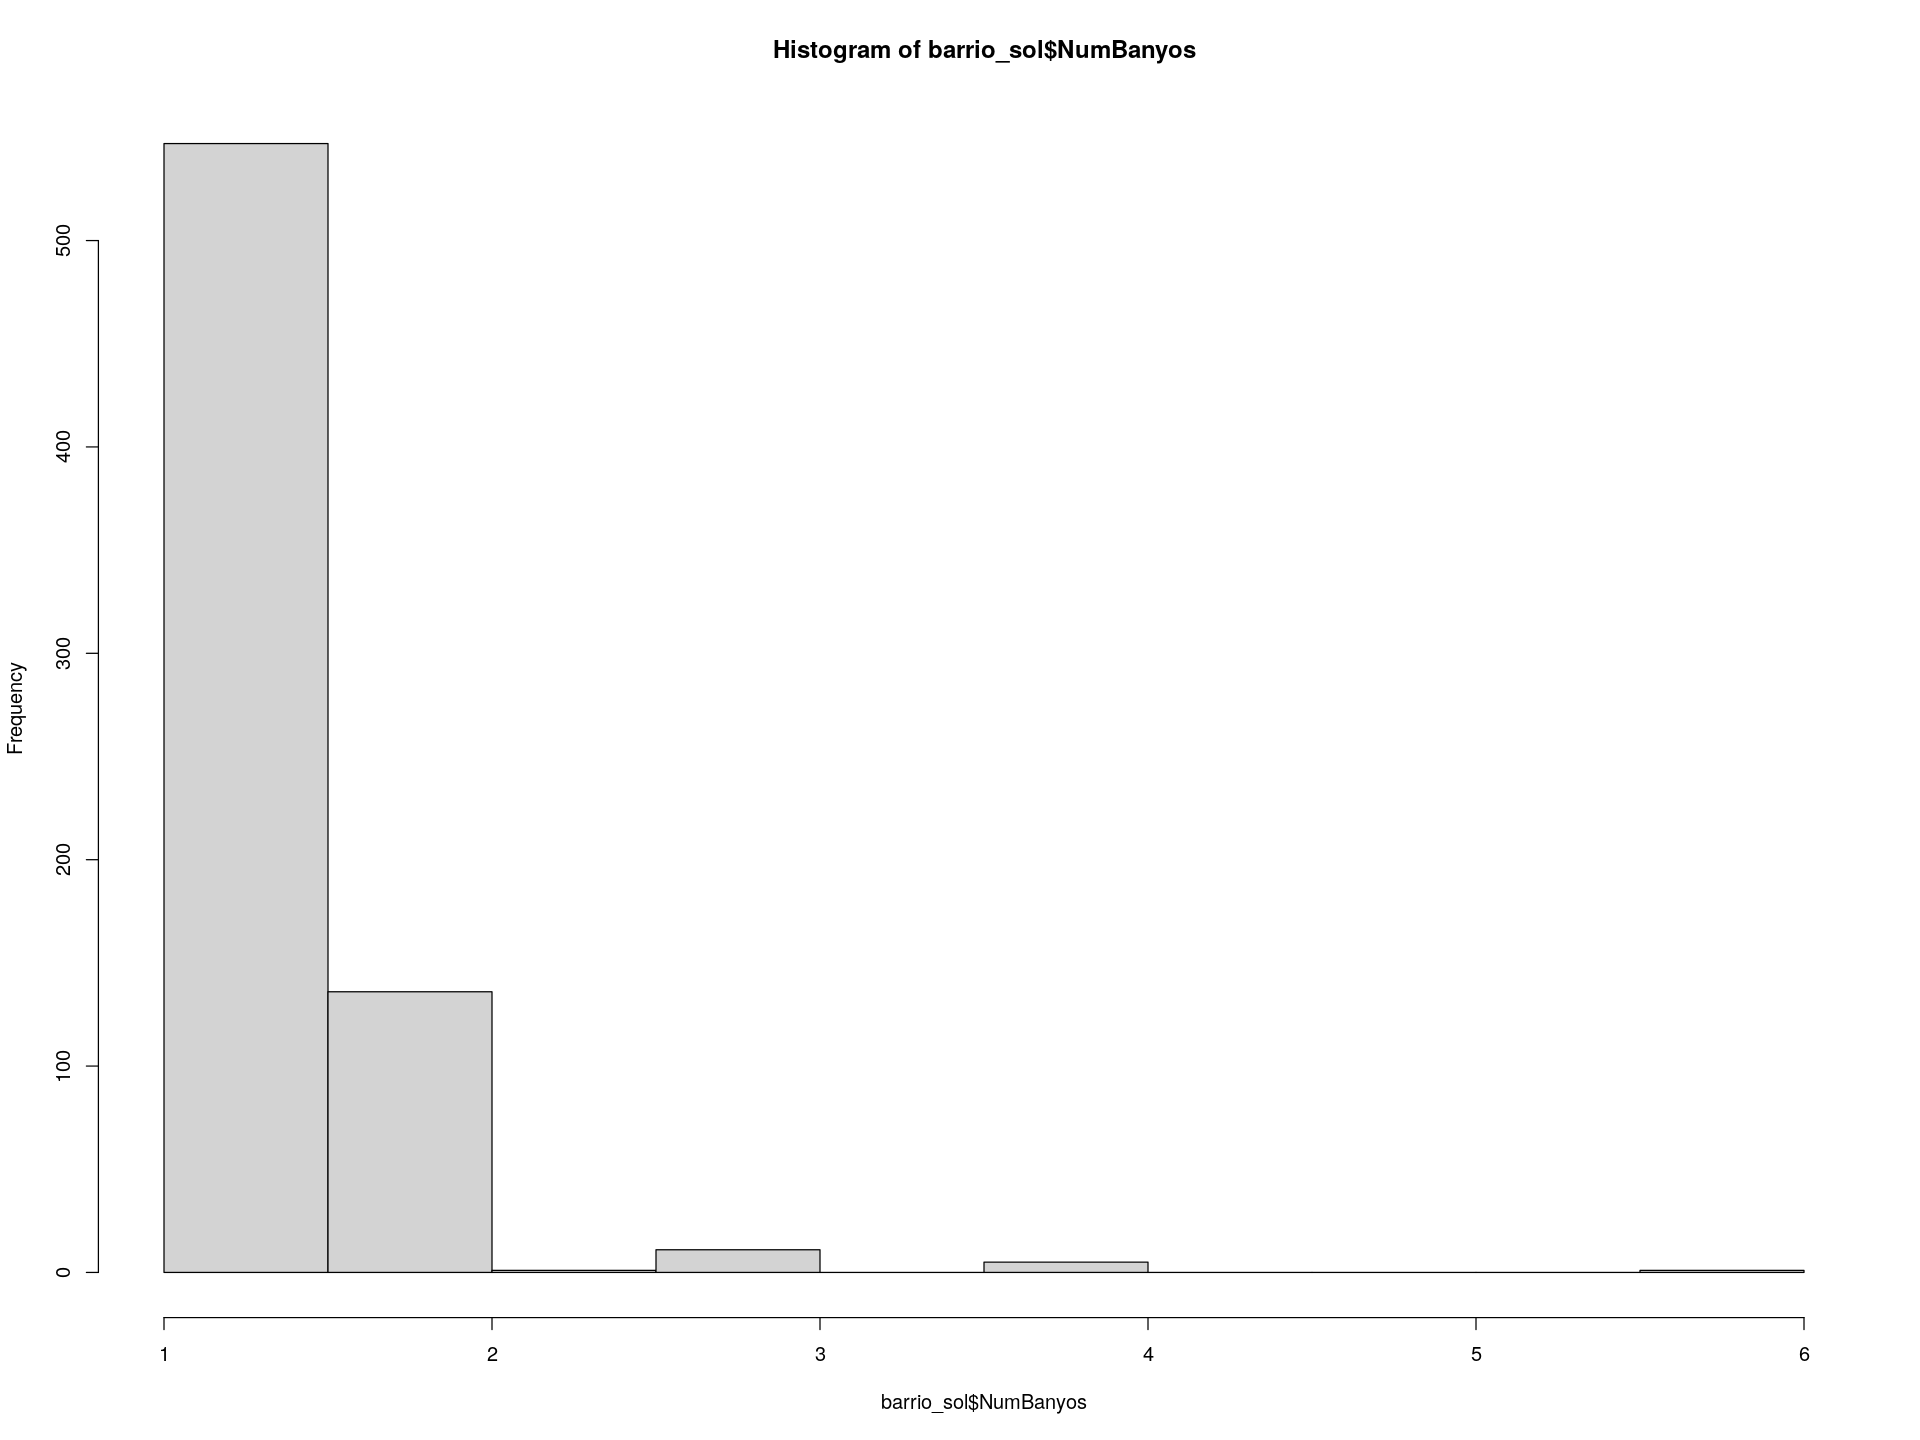

In [62]:
#no son de fiar, la columna MetrosCuadrados esta llena de NAs y muchos datos cercanos a 0.
ggplot(barrio_sol, aes(x=NumBanyos))+geom_density()+theme_bw()
hist(barrio_sol$NumBanyos)
barrio_sol$NumBanyos
summary(as.factor(barrio_sol$NumBanyos))

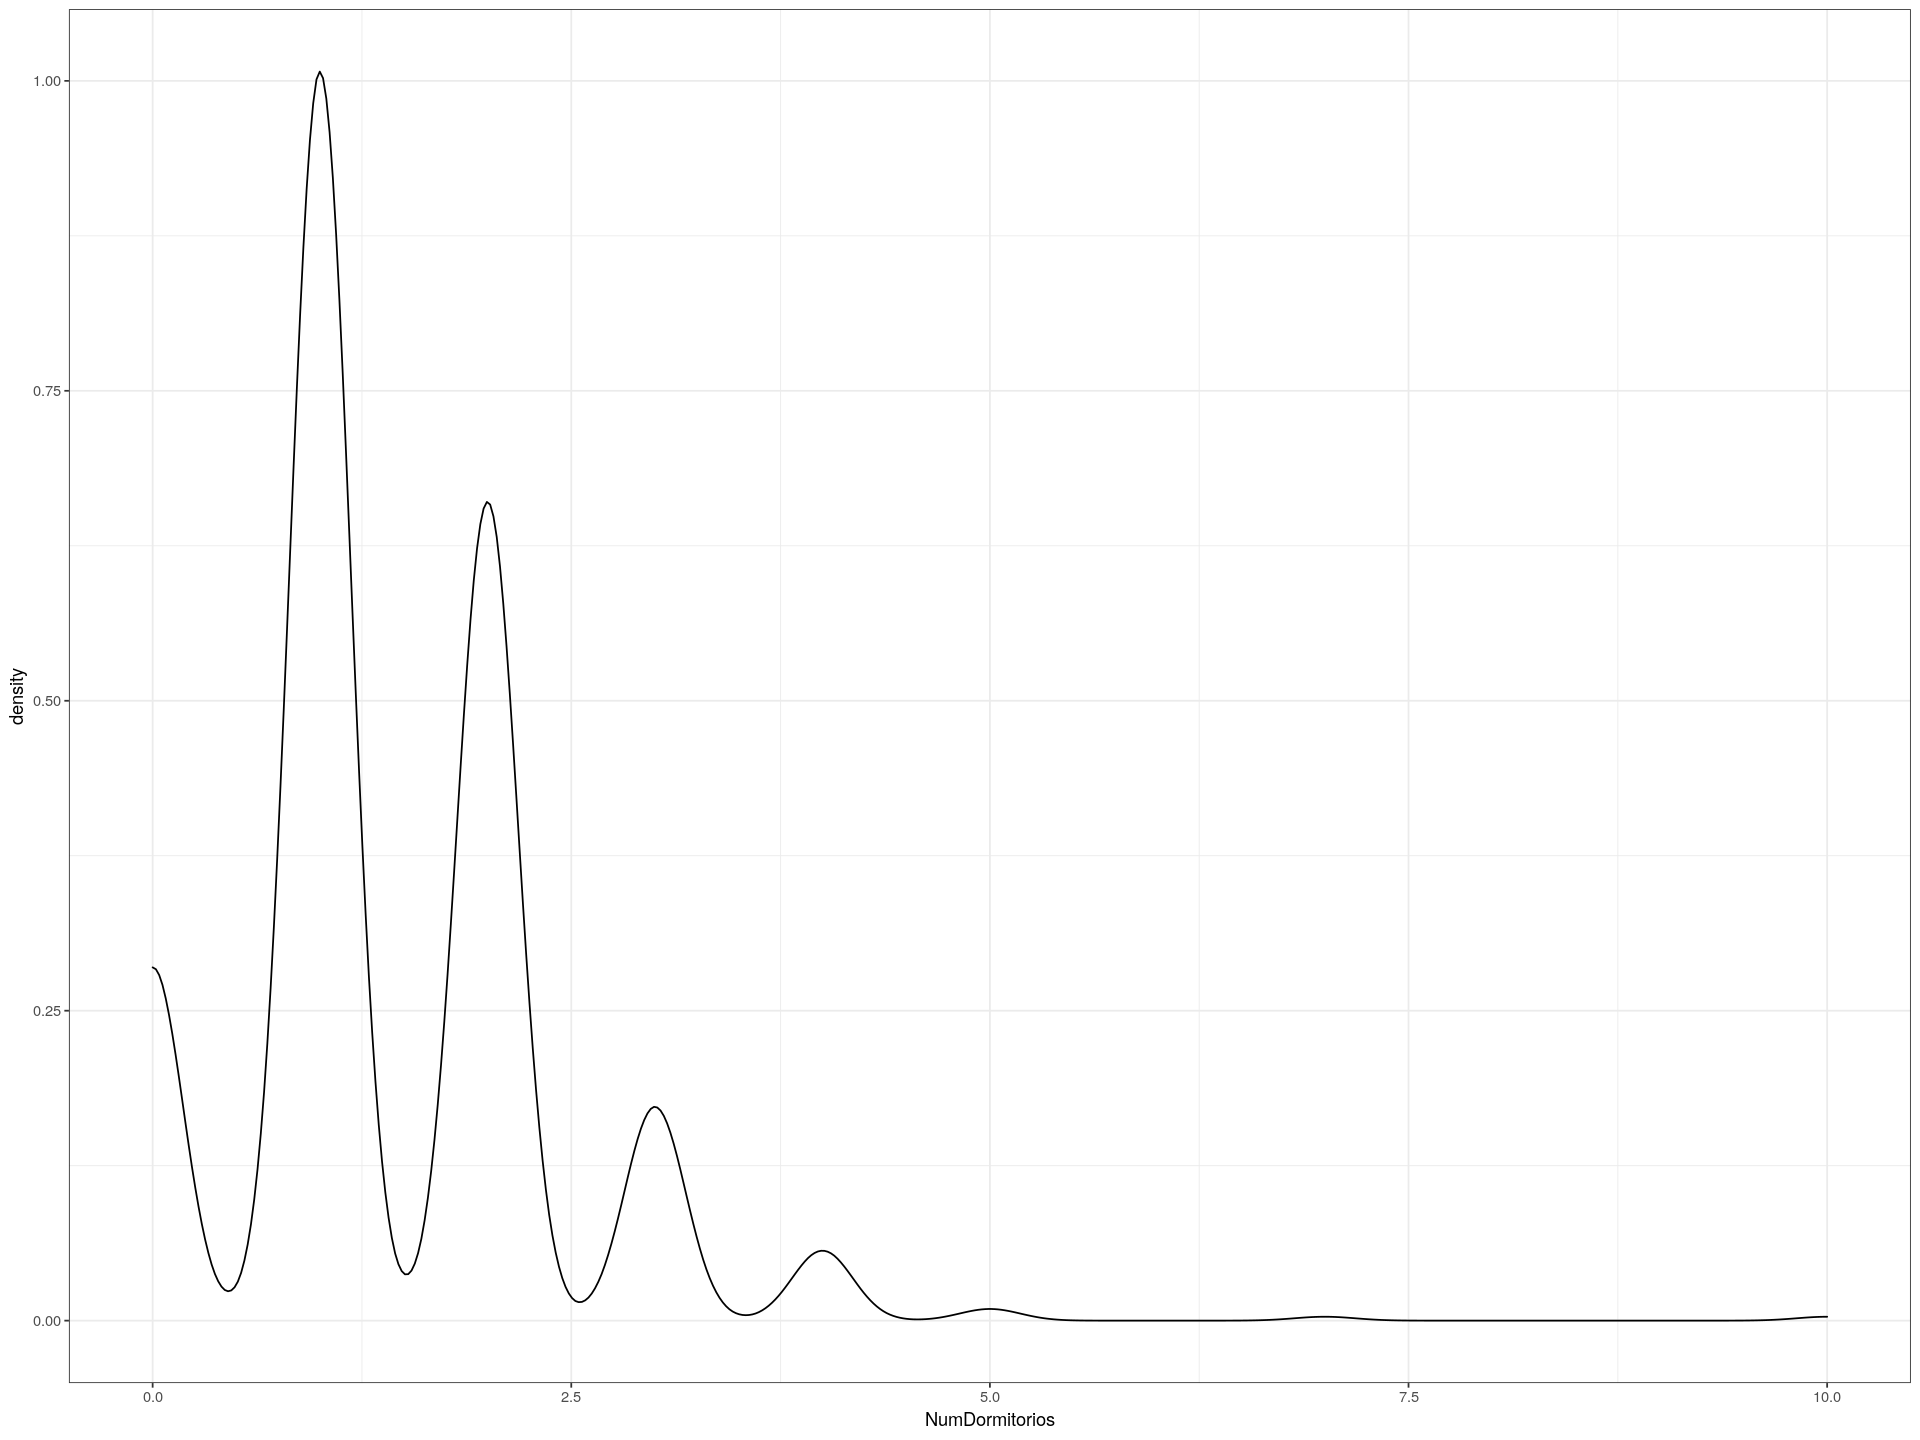

[1]  1  2  1  2  1  1  4  2  1  1  1  2  2  3  1  2  1  1  0  1  2  2  1  1  2
 [26]  1  4  2  2  0  2  4  1  1  2  4  1  2  3  0  1  0  1  1  1  2  1  7  1  2
 [51]  1  0  2  2  2  1  2  2  1  0  0  1  1  1  0  1  2  1  1  2  0  1  3  1  2
 [76]  2  1  3  2  2  0  1  0  0  1  1  1  0  0  2  3  1  1  2  2  0  1  2  1 10
[101]  4  1  1  1  2  1  1  1  0  2  1  2  2  2  2  1  2  1  1  0  1  2  1  2  1
[126]  1  2  2  2  2  1  2  1  2  2  3  2  1  1  1  1  2  1  1  0  2  0  1  1  1
[151]  2  1  1  1  2  1  2  1  2  2  1  1  1  1  1  2  2  1  1  0  3  1  1  3  2
[176]  2  0  1  2  1  1  1  0  1  3  1  1  1  2  1  2  3  1  1  2  2  2  2  0  2
[201]  2  1  4  1  1  1  1  1  1  2  1  1  2  1  2  1  1  3  1  0  1  1  1  1  1
[226]  0  1  3  2  1  0  1  1  1  1  0  1  1  1  4  1  2  2  1  2  1  1  2  3  2
[251]  2  1  1  0  1  1  2  1  1  1  2  1  2  1  0  1  2  1  2  1  2  1  2  1  2
[276]  2  3  1  2  1  4  0  4  2  2  0  2  2  2  1  0  3  2  3  1  0  0  1  1  2
[301]  1  1  3  1  4  2  1  2  3  3  2  4  1  2  2  1  3  2  2  0  1  2  0  3  0
[326]  0  2  1  1  1  1  1  2  1  1  2  0  1  2  1  1  1  2  2  3  2  1  2  1  1
[351]  1  1  3  5  1  2  2  2  1  1  3  1  2  0  0  1  2  1  0  1  0  3  1  0  3
[376]  2  2  0  2  1  2  3  3  2  1  1  1  1  1  1  2  2  2  1  1  2  1  0  1  2
[401]  2  1  1  1  0  1  2  1  2  1  1  0  2  2  2  2  0  1  0  2  0  3  0  2  0
[426]  2  2  2  1  1  1  0  2  2  4  1  1  1  0  1  0  1  2  1  1  1  1  0  3  2
[451]  2  3  0  2  0  1  1  1  1  4  2  2  1  1  1  0  1  3  1  1  3  2  2  2  2
[476]  1  0  1  1  2  3  3  1  1  4  2  2  0  1  5  1  1  2  4  1  1  0  2  1  2
[501]  1  0  2  4  1  3  1  1  2  2  1  0  0  2  1  1  1  0  1  1  1  1  1  1  1
[526]  1  3  2  1  2  0  1  1  3  0  2  1  2  1  1  2  1  2  1  1  0  4  1  1  1
[551]  2  0  1  2  2  0  2  1  1  1  2  2  2  1  1  5  3  2  1  1  3  1  0  1  3
[576]  1  0  1  1  0  1  2  1  1  0  2  1  3  4  1  1  0  1  0  1  1  2  1  1  2
[601]  2  3  1  0  3  1  2  2  2  1  1  0  1  3  1  1  2  0  1  0  3  2  3  2  1
[626]  2  2  1  0  0  2  1  2  1  1  2  1  1  0  1  1  2  1  1  1  3  3  1  0  2
[651]  1  2  2  2  2  1  2  3  2  2  1  1  3  0  3  2  2  2  2  1  0  2  3  1  2
[676]  2  2  1  3  1  1  1  0  1  1  1  1  1  1  1  3  2  2  2  1  0  2  0  1  1
[701]  1

0   1   2   3   4   5   7  10 
 91 321 211  55  18   3   1   1

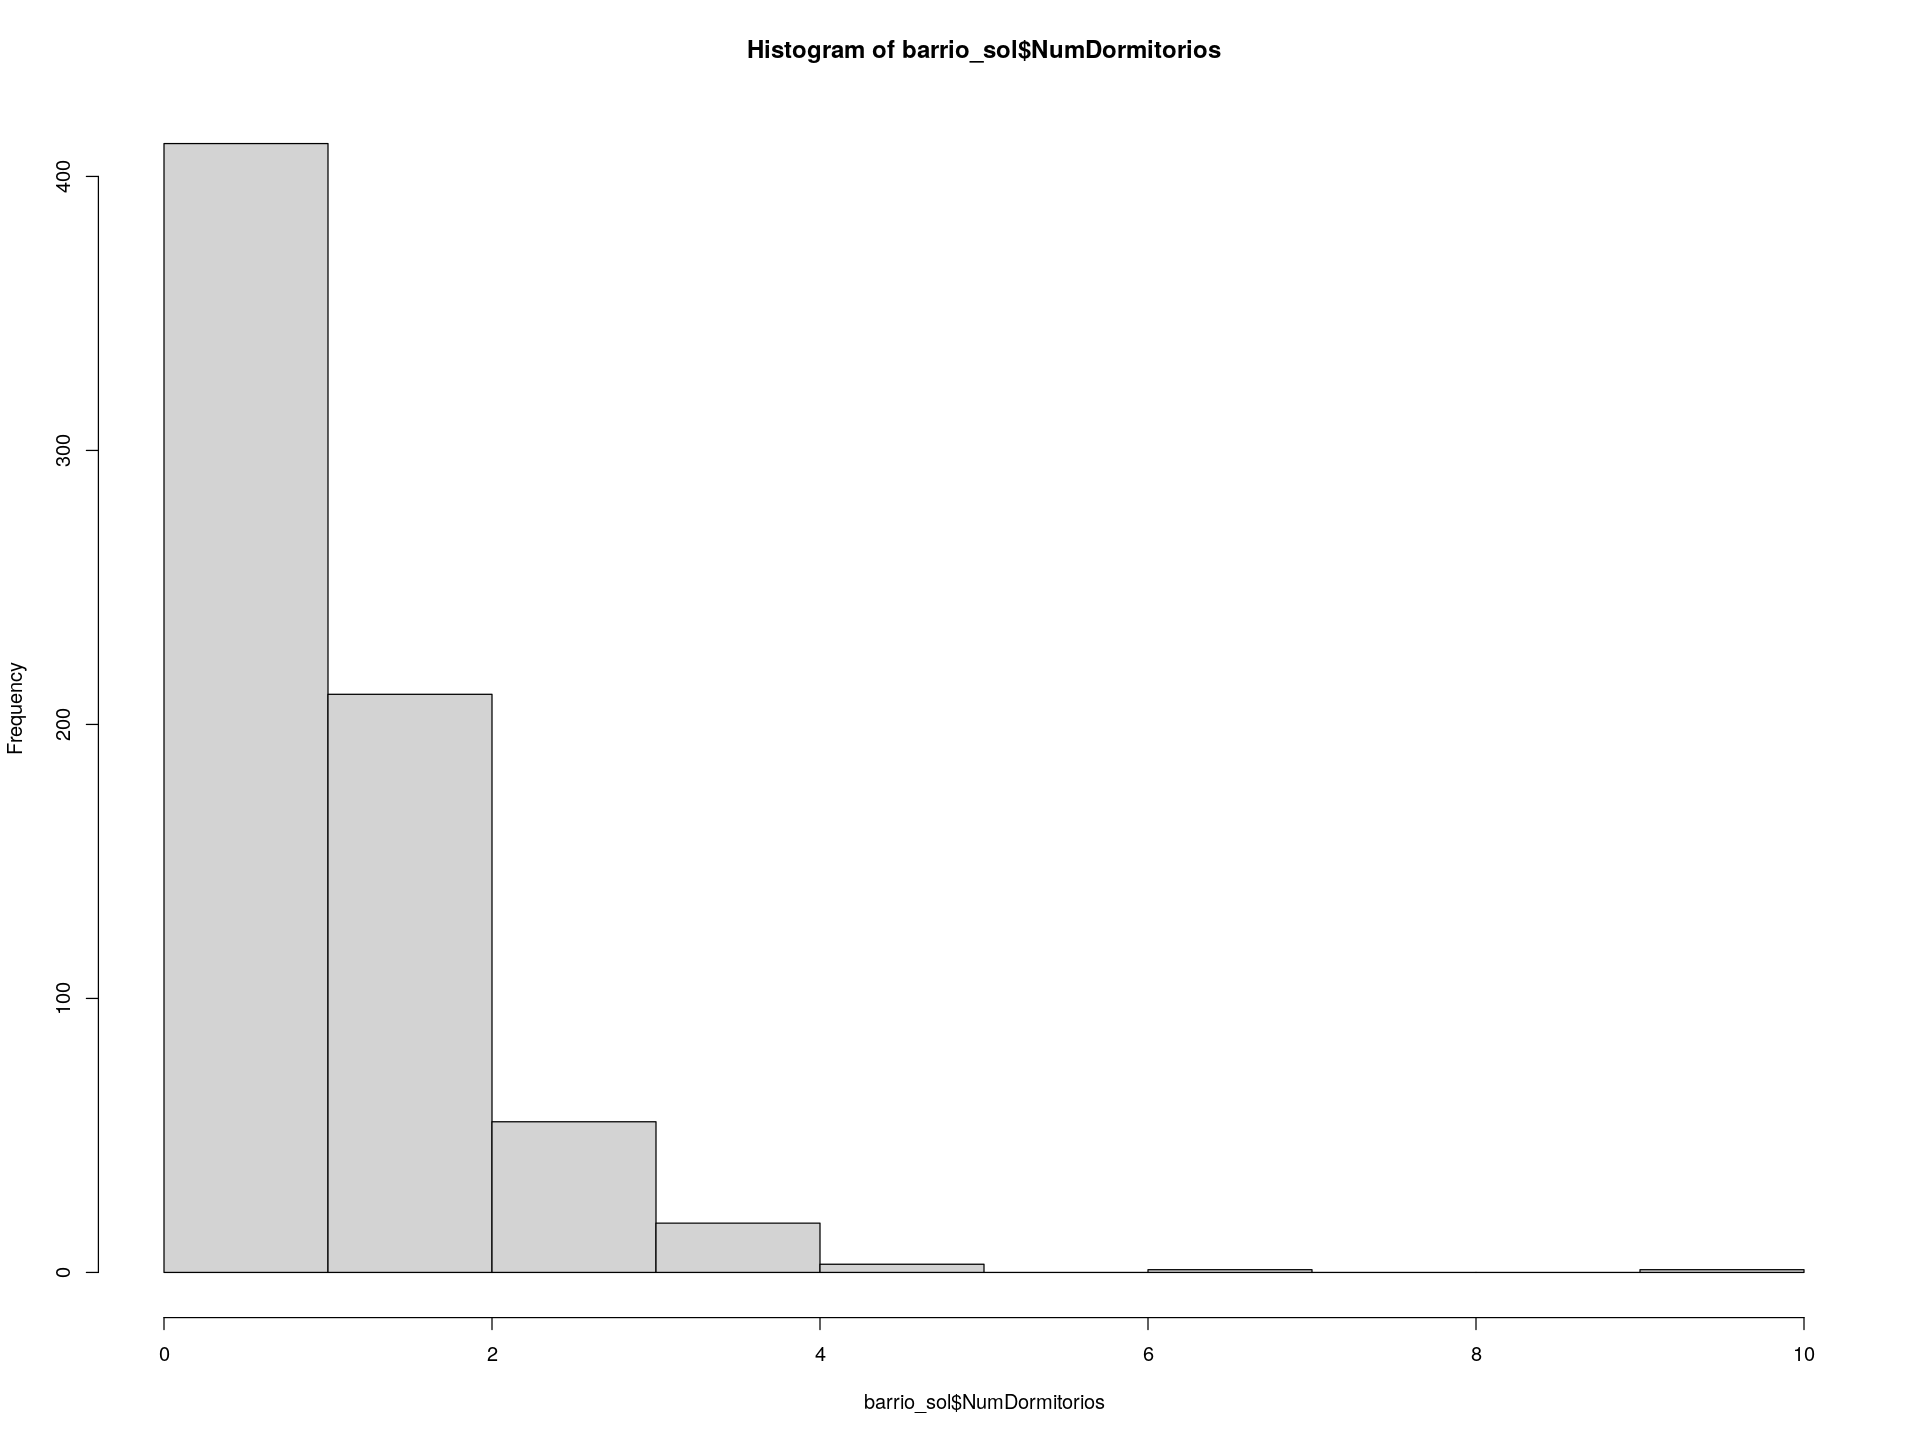

In [63]:
ggplot(barrio_sol, aes(x=NumDormitorios))+geom_density()+theme_bw()
hist(barrio_sol$NumDormitorios)
barrio_sol$NumDormitorios
summary(as.factor(barrio_sol$NumDormitorios))

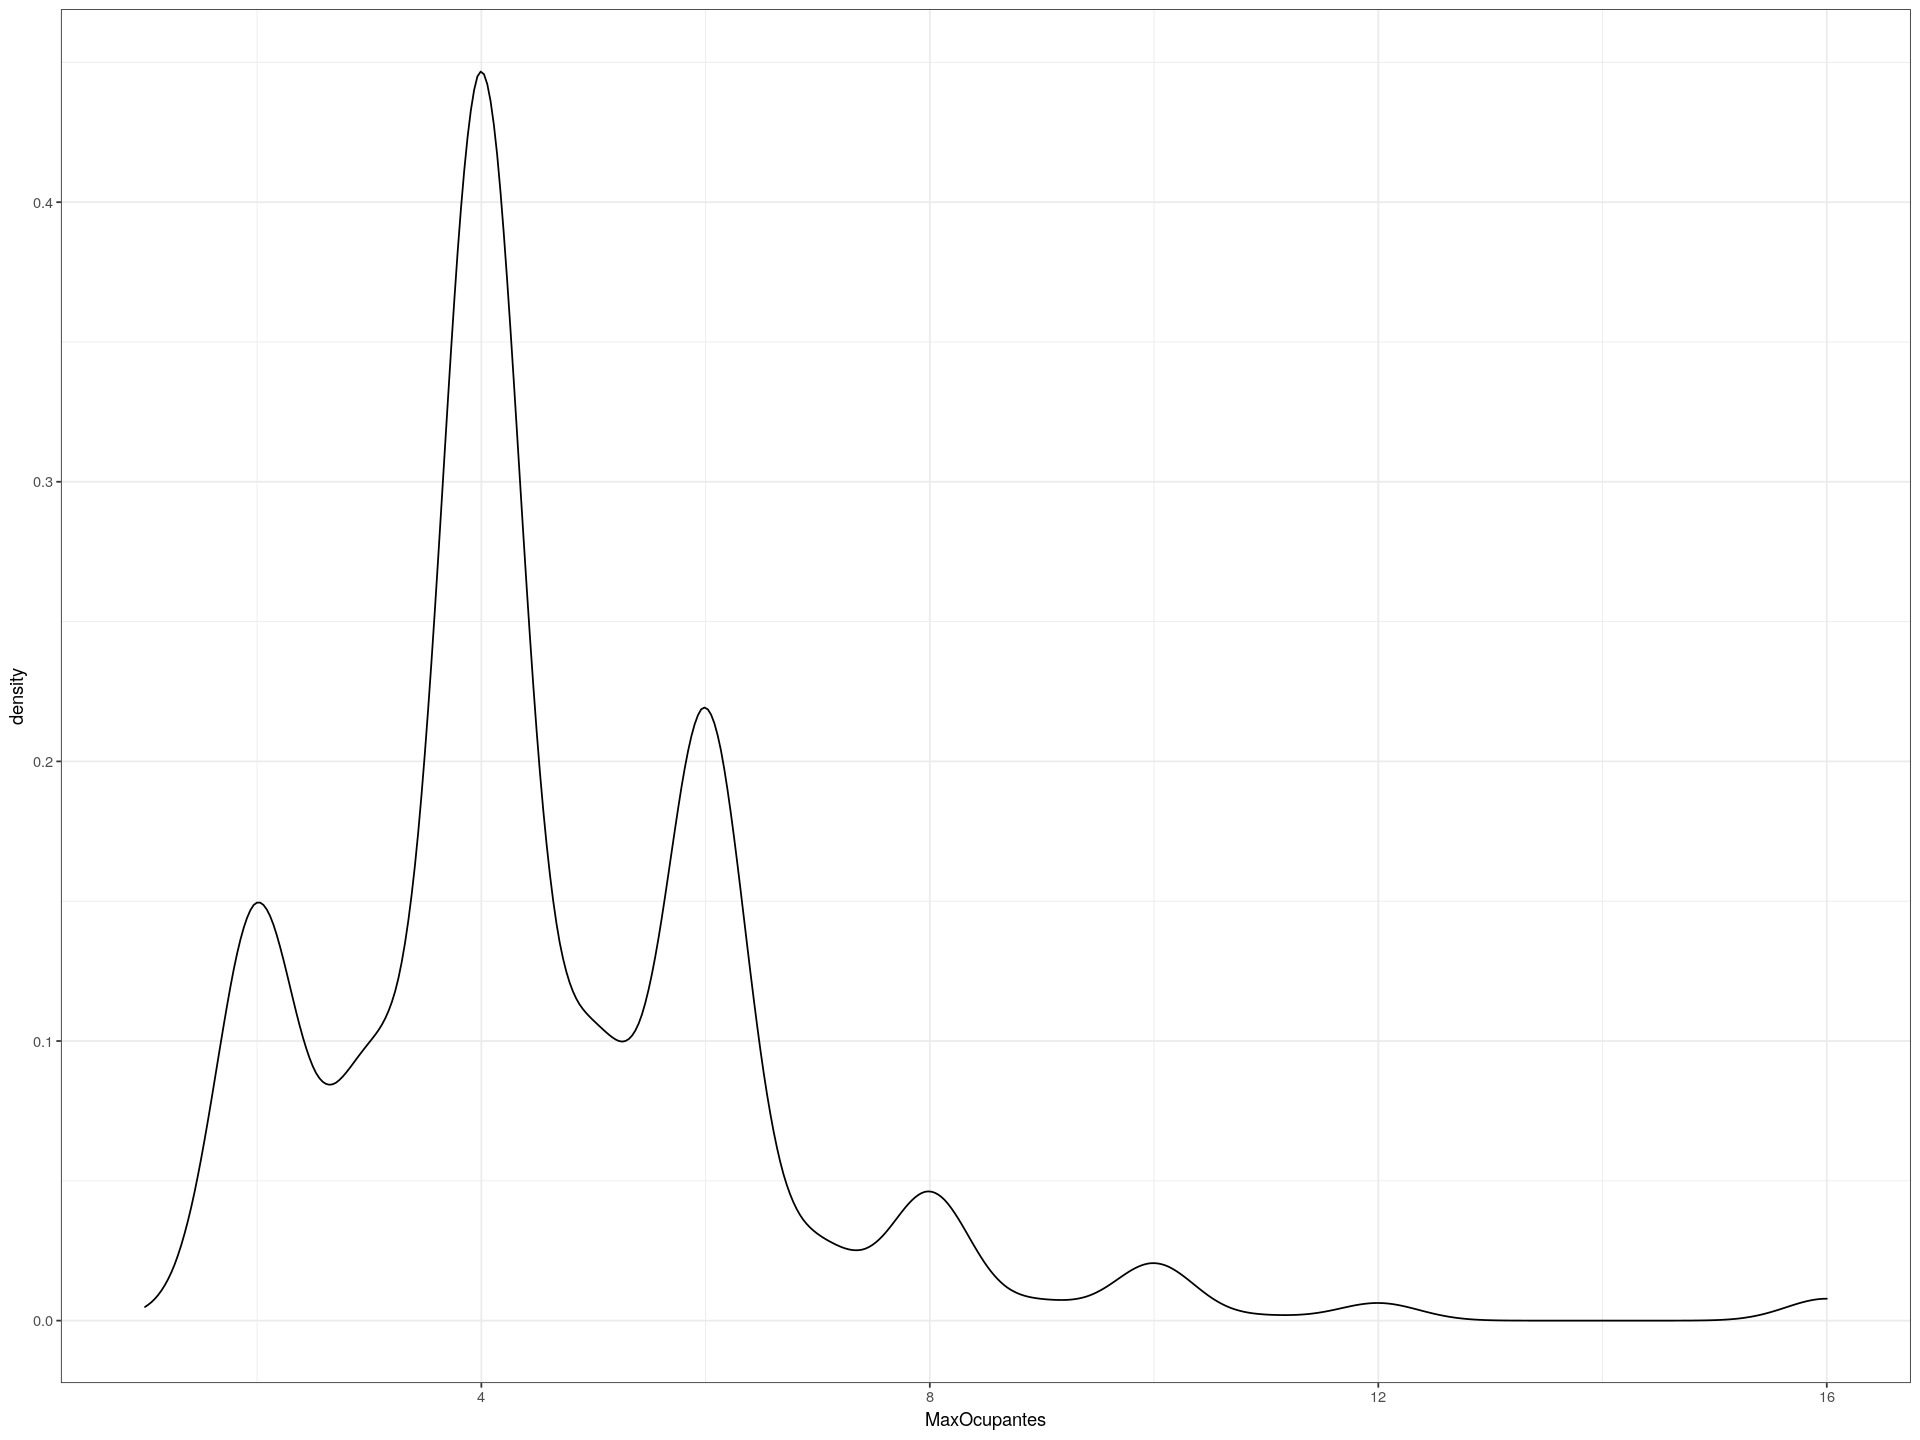

[1]  4  6  4  6  4  4 10  6  4  4  4  8  6  8  4  6  3  2  3  3  4  4  4  4  4
 [26]  4 16  5  8  4  6  8  2  4  6  9  4  6  8  2  2  3  4  4  4  6  4 16  4  6
 [51]  3  4 10  5  5  4  6  6  4  3  2  4  6  2  4  2  6  5  4  6  2  4  7  4  4
 [76]  6  4  8  8  4  4  4  2  2  4  2  2  4  4  7  7  4  4  4  7  3  2  6  4 16
[101]  6  6  4  4  6  4  4  4  4  4  4  6  6  4  6  3  5  5  2  2  4 12  4  6  6
[126]  2  4  6  6  8  4  7  4  8  5  8  6  4  4  4  2  6  3  4  2  6  6  4  2  3
[151]  6  4  6  3  4  5  5  4  6  6  4  4  2  4  4  5  4  4  3  4  7  4  2  6  4
[176]  6  4  4  4  4  6  4  3  3  7  2  2  4  7  5  5  6  2  2  3  4  6  4  2  4
[201]  6  7  7  4  2  4  3  2  4  4  4  4  5  2  6  4  4  8  3  2  4  4  3  5  4
[226]  4  3  5  6  4  2  4  2  4  4  4  5  2  4 10  6  4  5  3  5  4  4  4  5  6
[251]  6  2  2  3  2  3  4  4  4  4  4  4  6  4  4  4  4  4  4  4 10  4  5  3  6
[276]  6 10  4  5  2 10  2  6  6  5  4  6  4  6  4  4 10  6  8  5  2  2  4  2  5
[301]  4  2  7  4 10  6  2  8  6  5  5 16  4  6  5  4  4  6  6  2  4  4  4 12  4
[326]  5  6  4  4  3  4  2  6  4  3  6  4  2  4  2  4  5  5  5  6  6  4  5  4  2
[351]  4  4  6 10  6  4  4  5  3  2 11  3  6  3  2  4  5  2  3  2  2  7  4  4  6
[376]  6  5  3  5  4  6  6  6  6  4  2  4  4  4  5  6  4  8  3  5  6  4  3  4  6
[401]  6  5  3  4  4  2  6  4  6  4  3  2  6  4  6  6  4  4  4  5  4  8  4  4  2
[426]  6  6  4  4  4  4  4  5  6  9  4  4  4  3  4  4  3  6  4  4  4  2  3  6  6
[451]  6  6  3  6  3  2  3  4  4 12  6  6  4  5  4  2  2  6  4  4  5  6  9  6  3
[476]  4  4  3  4  6  6  6  2  4  6  5  6  4  4 10  4  4  6  8  4  4  2  5  4  4
[501]  1  3  6  5  2  7  4  4  9  6  4  4  2  8  4  6  4  2  4  4  2  4  4  4  4
[526]  4  8  6  3  6  2  5  3  6  3  8  4  6  4  2  4  2  4  4  3  3 10  4  4  4
[551]  6  6  4  5  8  4  4  3  4  4  4  6  6  4  4  7  8  4  2  4  5  2  4  5  5
[576]  4  4  4  2  2  3  6  4  2  2  4  4 12 16  4  4  2  2  2  4  4  6  2  2  7
[601]  6  8  4  4  8  4  5  4  6  2  4  3  4  8  4  4  6  4  2  2  8  6  5  6  3
[626]  6  5  4  2  4  3  4  7  6  4  6  4  4  4  4  3  6  2  2  4  8  8  4  5  4
[651]  4  6  5  4  6  4  6  8  6  5  4  2  6  2 10  6  5  4  6  2  4  4  6  4  6
[676]  6  6  3 10  4  4  4  4  4  4  2  6  4  4  4  8  4  5  6  2  2  4  4  6  2
[701]  4

1   2   3   4   5   6   7   8   9  10  11  12  16 
  1  94  55 282  59 138  16  29   4  13   1   4   5

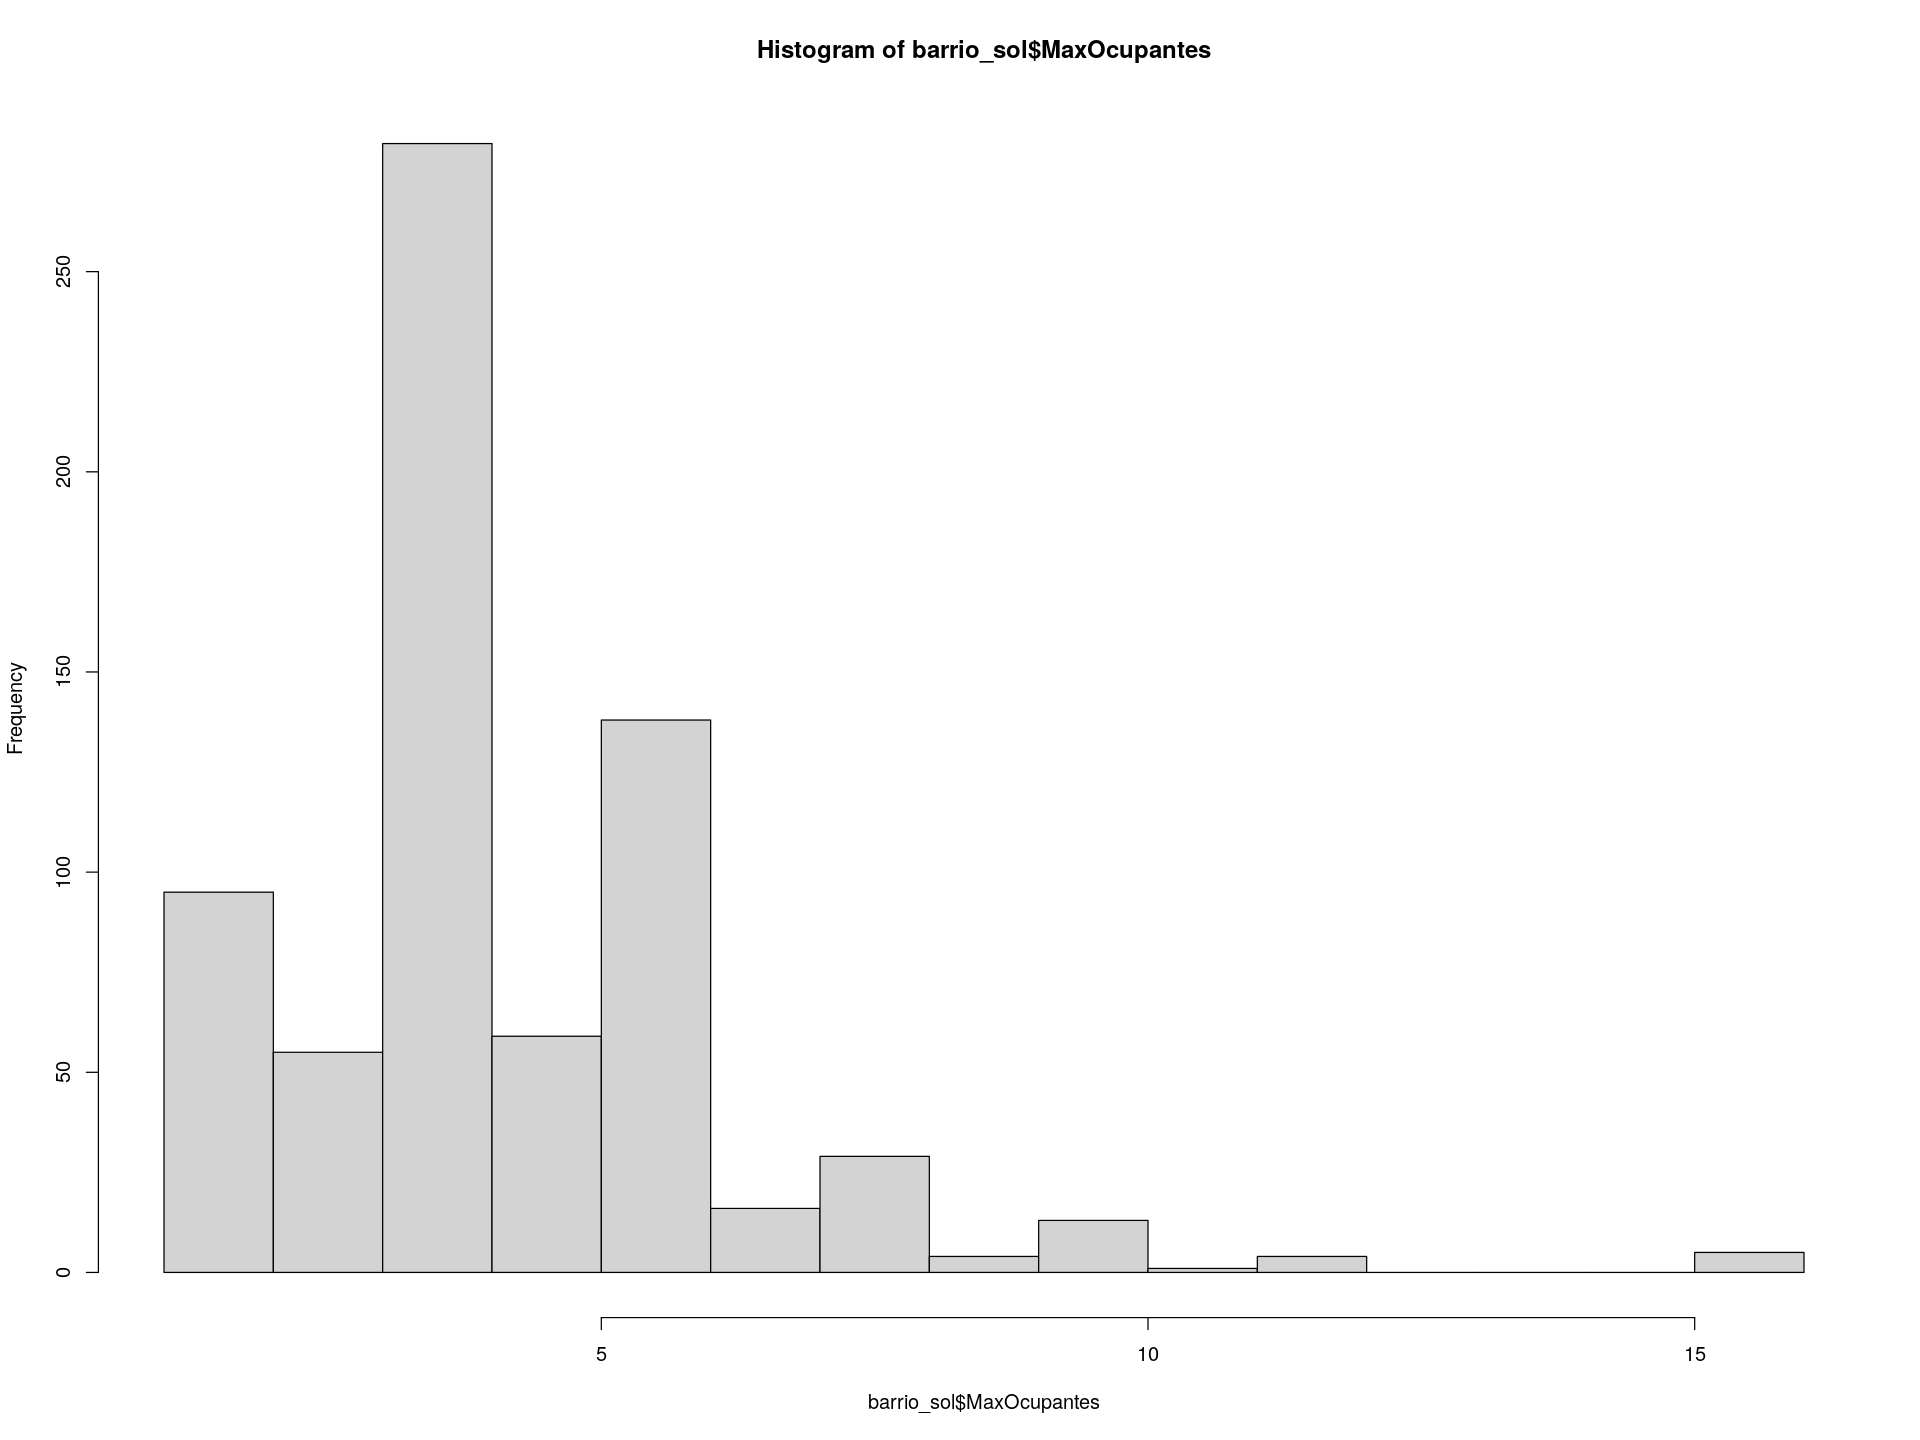

In [64]:
ggplot(barrio_sol, aes(x=MaxOcupantes))+geom_density()+theme_bw()
hist(barrio_sol$MaxOcupantes)
barrio_sol$MaxOcupantes
summary(as.factor(barrio_sol$MaxOcupantes))

Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


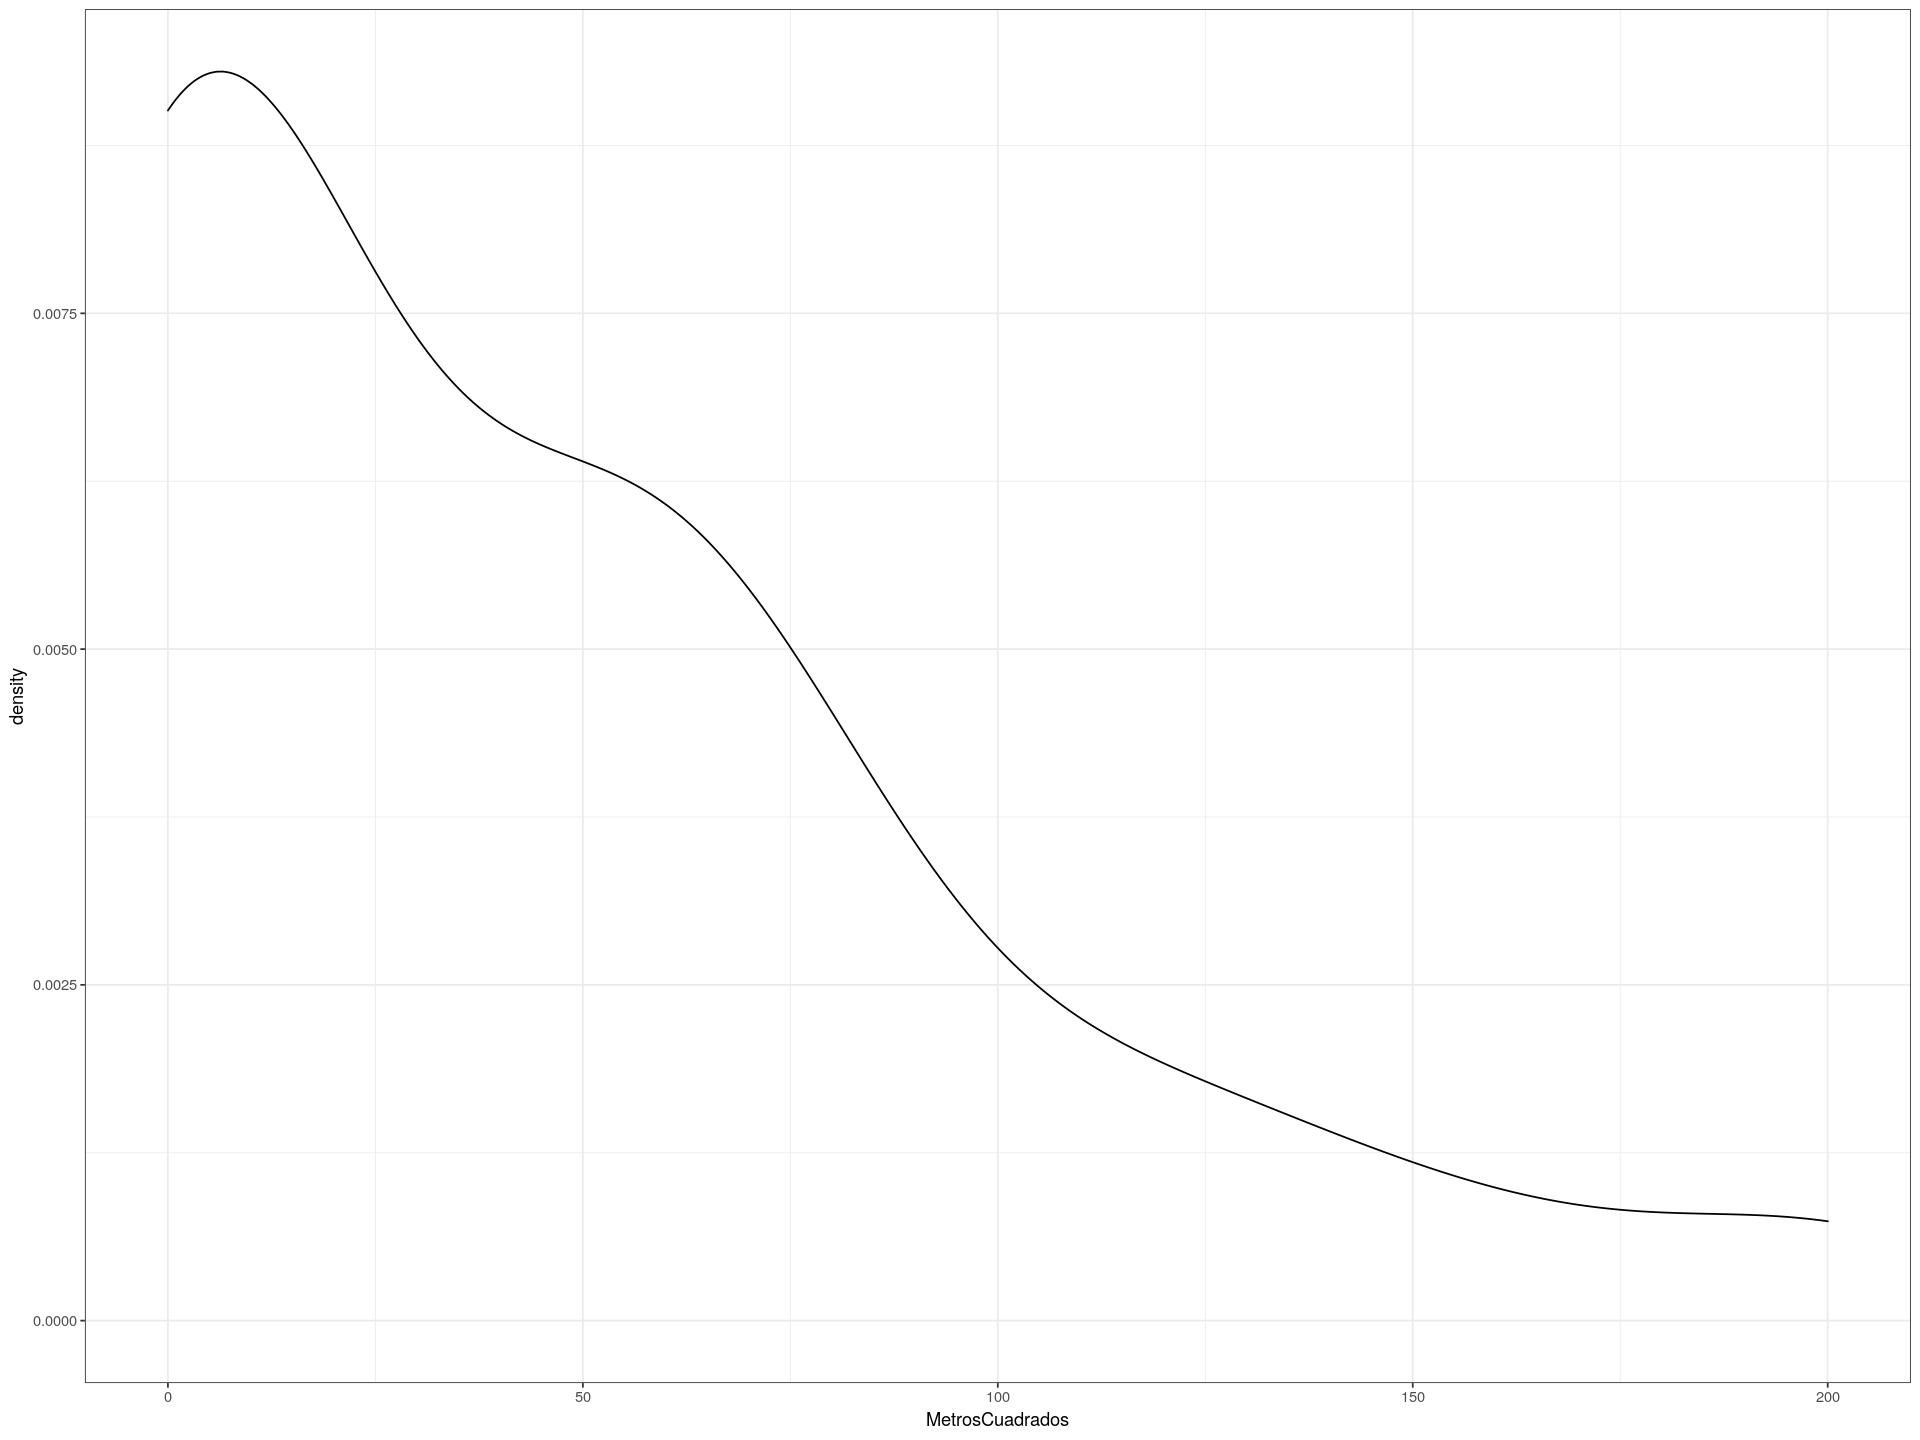

[1]  60.015338  69.955959  24.990907   0.000000   0.000000 200.020159
 [7]  49.981814 134.988059   0.000000  85.006245  40.041193   0.000000
[13]  60.015338   4.180635   4.180635   0.000000  82.033349   0.000000
[19]  19.045115  65.032100   4.645150  60.015338   0.000000  44.965052
[25]  40.041193 120.030676   0.000000   0.000000  60.015338   0.000000
[31] 150.038345   0.000000  19.974145  37.997327  36.975394   0.000000
[37]  54.998576   0.000000 115.013914 200.020159   0.000000  30.007669
[43]   0.000000 120.030676  57.971472  56.020509   0.000000 164.995728
[49]  74.972721   0.000000   6.596113  69.955959   0.000000  99.963628
[55]  87.979141   9.290300  74.972721   0.000000  40.041193   0.000000
attr(,"na.action")
  [1]   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  20  21  22
 [19]  23  24  25  26  27  29  30  31  33  34  35  36  37  38  39  40  41  42
 [37]  43  44  45  46  48  49  50  51  52  54  55  56  57  58  59  60  61  62
 [55]  63  64  65  66  67  68  69  70  71  73  74  75  76  78  79  80  81  82
 [73]  83  84  85  87  88  90  91  92  93  94  95  98  99 100 101 102 103 104
 [91] 105 106 108 109 110 111 112 113 114 115 116 118 119 120 121 122 123 124
[109] 125 126 127 128 129 130 131 132 133 135 136 137 138 139 140 141 143 144
[127] 145 146 147 148 150 151 152 153 154 155 156 157 158 159 160 161 162 163
[145] 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
[163] 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
[181] 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
[199] 218 219 220 221 223 224 225 226 227 228 229 230 231 232 233 234 235 236
[217] 237 240 241 242 245 246 247 248 249 250 251 252 253 254 255 256 257 258
[235] 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
[253] 277 278 279 281 282 283 284 285 286 287 288 289 290 291 294 295 297 298
[271] 299 300 301 302 303 305 306 307 308 309 310 311 312 313 314 315 317 318
[289] 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336
[307] 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 355
[325] 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373
[343] 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391
[361] 392 393 394 395 396 397 398 399 400 401 402 403 404 405 407 408 409 410
[379] 412 413 414 415 416 417 418 419 420 422 424 425 426 427 428 429 430 431
[397] 432 433 434 435 437 438 439 440 441 442 443 444 446 448 449 450 451 452
[415] 453 454 455 456 457 458 459 461 462 463 464 465 466 467 468 469 470 471
[433] 472 473 474 475 476 477 478 479 480 482 483 484 485 486 487 489 490 491
[451] 492 493 494 495 496 498 499 500 501 502 503 504 505 506 508 509 510 511
[469] 512 513 515 516 518 519 520 521 522 523 524 525 526 527 528 529 530 531
[487] 532 533 534 535 536 537 538 539 540 541 542 543 545 546 547 548 549 550
[505] 551 552 553 554 555 556 558 559 560 561 562 563 564 565 567 568 569 570
[523] 571 572 573 574 575 576 577 578 579 580 581 583 584 585 586 587 588 590
[541] 591 592 593 594 595 596 597 598 600 601 602 603 604 605 606 607 608 609
[559] 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 628
[577] 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646
[595] 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664
[613] 667 670 671 672 673 674 675 676 677 678 680 681 682 683 684 685 686 687
[631] 688 691 692 694 695 696 697 698 699 700 701
attr(,"class")
[1] "omit"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00   37.49   45.62   69.96  200.02     641 

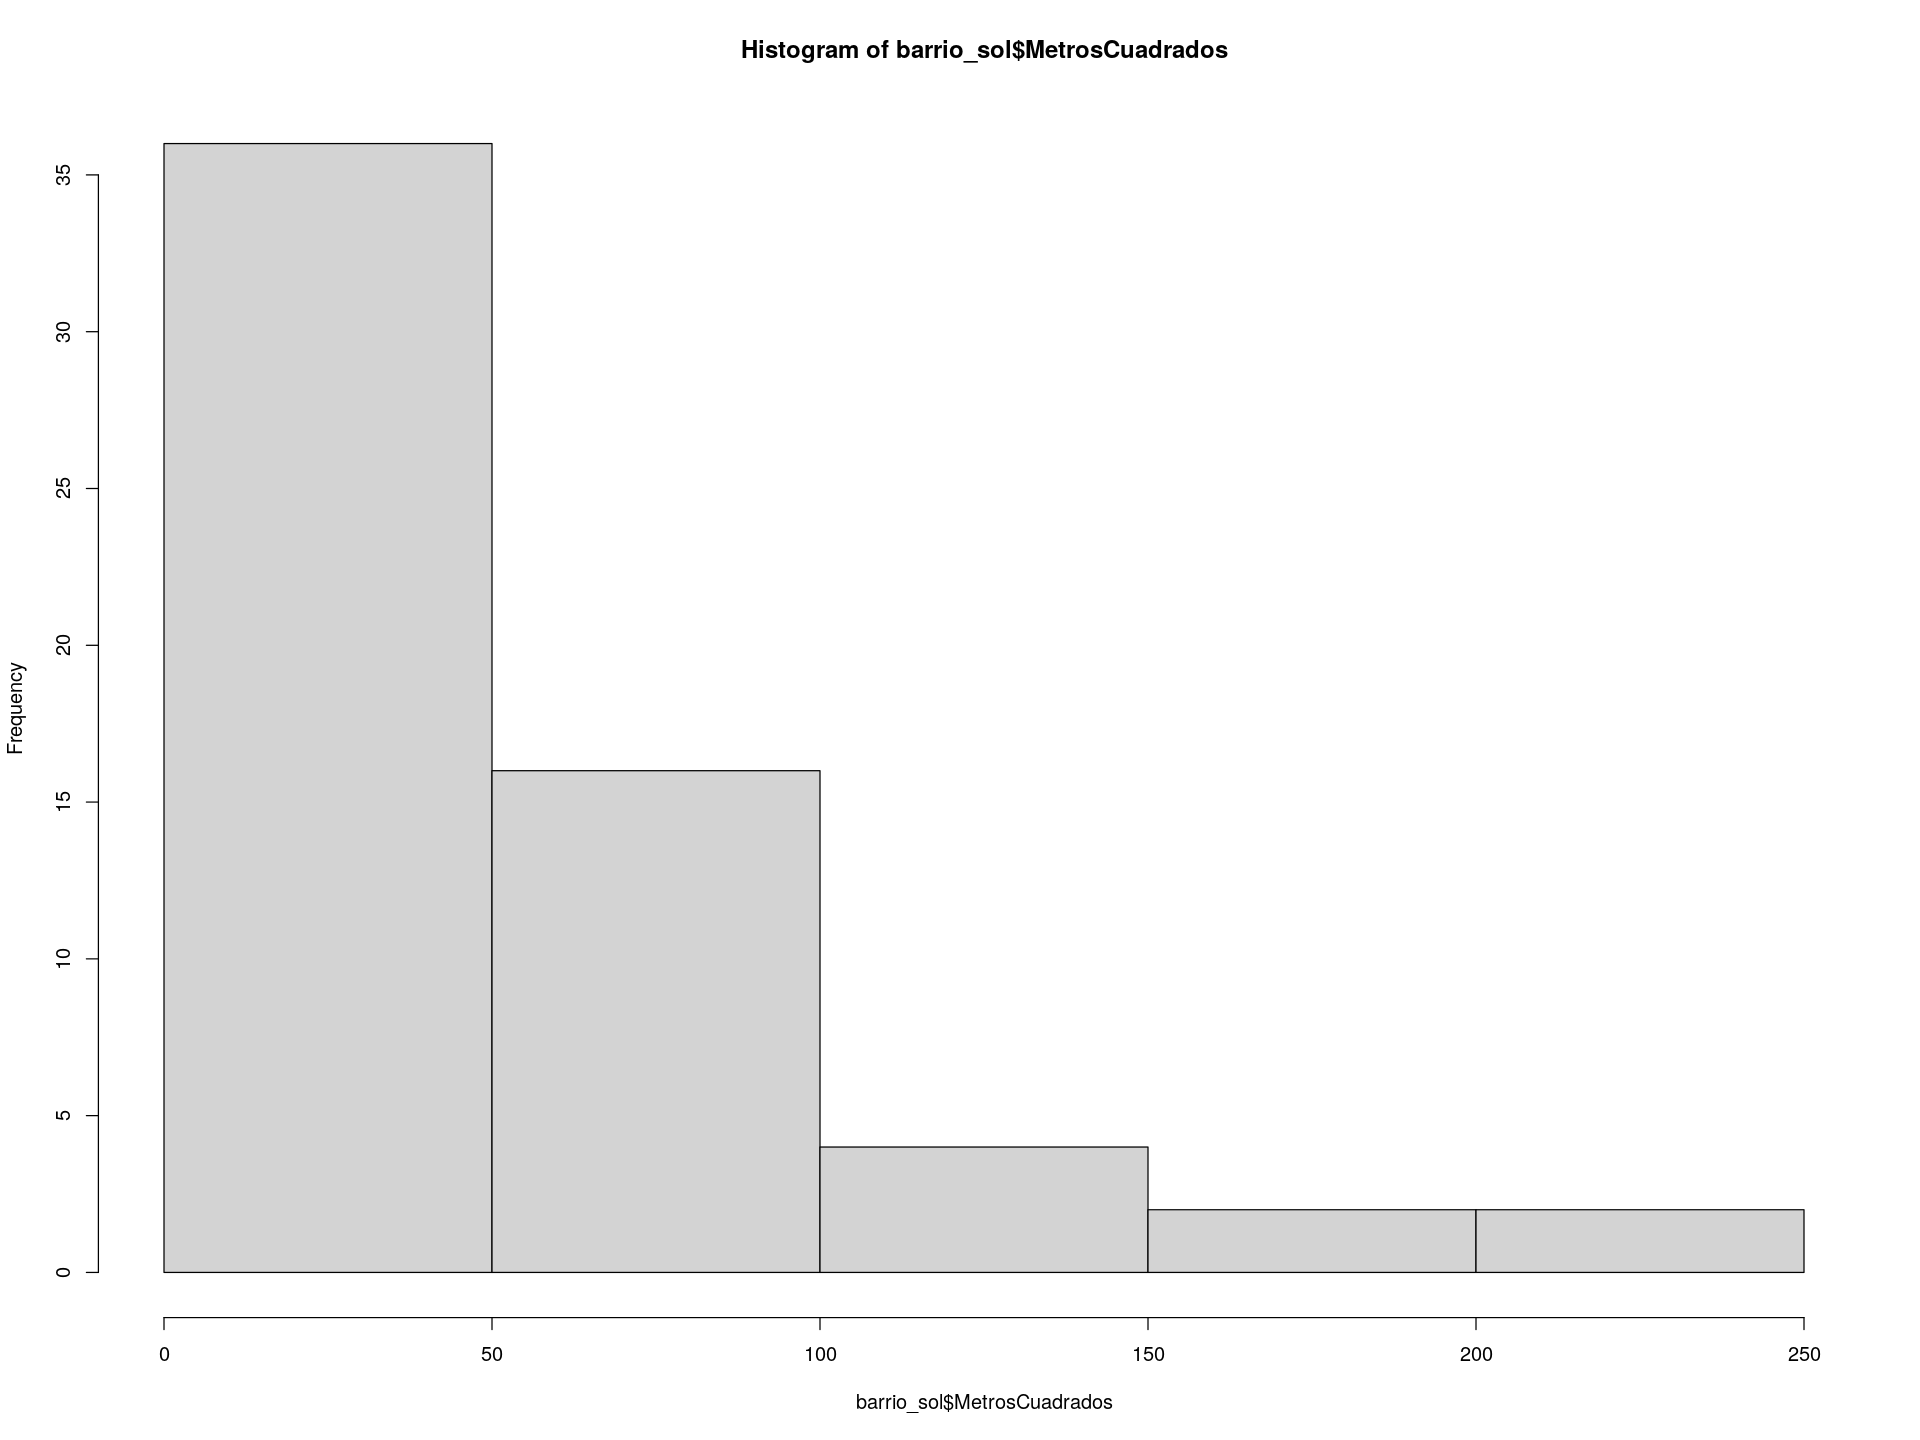

In [65]:
ggplot(barrio_sol, aes(x=MetrosCuadrados))+geom_density()+theme_bw()
hist(barrio_sol$MetrosCuadrados)
na.omit(barrio_sol$MetrosCuadrados)
summary(barrio_sol$MetrosCuadrados)

In [66]:
#dentro de todo, los banhos no son 0, lo que tiene sentido, lo banhos y medio no tienen mucho sentido pero puede ser que tengan solo ducha o solo WC
#los numeros de ocupantes parecen logicos.
#los numeros de dormitorios tienen valores que son cero, pero imagino que puede ser una propiedad con camas en la sala, tipo studio.
#los metros cuadrados, tienen valores muy bajos asi estimo que tienen que ser mayores que cero metros cuadrados.
barrio_solUP<-barrio_sol[barrio_sol$MetrosCuadrados > 0,-c(1,2,3)]
barrio_solUP<-droplevels(barrio_solUP)
na.omit(barrio_solUP[barrio_solUP$MetrosCuadrados < 90,])
#quitare los apartamentos con menos de 10 metros cuadrados
barrio_solUP2<-barrio_solUP[barrio_solUP$MetrosCuadrados >= 10,]
barrio_solUP2

,MaxOcupantes,NumBanyos,NumDormitorios,Precio,MetrosCuadrados
,<int>,<dbl>,<int>,<int>,<dbl>
15,4,1,1,75,60.015338
25,4,1,1,100,69.955959
46,2,1,1,65,24.990907
684,4,1,1,108,49.981814
1414,4,1,1,70,85.006245
1424,2,1,1,77,40.041193
1578,3,1,0,45,60.015338
1580,2,1,1,82,4.180635
1592,4,1,1,82,4.180635


,MaxOcupantes,NumBanyos,NumDormitorios,Precio,MetrosCuadrados
,<int>,<dbl>,<int>,<int>,<dbl>
15,4,1,1,75,60.01534
NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA
NA.6,NA,NA,NA,NA,NA
NA.7,NA,NA,NA,NA,NA


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [67]:
cor(barrio_solUP2[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")], use = "pairwise.complete.obs")
#colinearidad fuerte en practicamente todos los casos!

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7292599,0.8589205,0.6113095
NumDormitorios,0.7292599,1.0000000,0.7855310,0.8215065
MaxOcupantes,0.8589205,0.7855310,1.0000000,0.7121088
MetrosCuadrados,0.6113095,0.8215065,0.7121088,1.0000000


In [68]:
model1<-lm(data=barrio_solUP2, formula = Precio ~ MaxOcupantes+NumBanyos+NumDormitorios+MetrosCuadrados)
summary(model1)


Call:
lm(formula = Precio ~ MaxOcupantes + NumBanyos + NumDormitorios + 
    MetrosCuadrados, data = barrio_solUP2)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.852 -13.673  -5.048  18.523  69.473 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      28.0362    12.9584   2.164  0.03859 * 
MaxOcupantes      2.6738     4.4329   0.603  0.55093   
NumBanyos         0.5647    14.6038   0.039  0.96941   
NumDormitorios   28.2119     8.5440   3.302  0.00249 **
MetrosCuadrados   0.2237     0.2050   1.091  0.28393   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.32 on 30 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7267 
F-statistic:  23.6 on 4 and 30 DF,  p-value: 6.728e-09


In [69]:
car::vif(model1)
#borramos MaxOcupantes por que tiene un VIF mayor a 5 

MaxOcupantes       NumBanyos  NumDormitorios MetrosCuadrados 
       5.067998        4.000696        4.308050        3.247805

In [70]:
model2<-lm(data=barrio_solUP2, formula = Precio ~ NumBanyos+NumDormitorios+MetrosCuadrados)
summary(model2)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados, 
    data = barrio_solUP2)

Residuals:
    Min      1Q  Median      3Q     Max 
-81.654 -12.699  -5.461  17.571  73.114 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      29.4746    12.6057   2.338  0.02600 * 
NumBanyos         6.5751    10.5658   0.622  0.53829   
NumDormitorios   29.2928     8.2678   3.543  0.00128 **
MetrosCuadrados   0.2519     0.1976   1.275  0.21174   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31 on 31 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.7559,	Adjusted R-squared:  0.7323 
F-statistic:    32 on 3 and 31 DF,  p-value: 1.284e-09


In [71]:
car::vif(model2)
#esto esta mejor, ahora sacare variables dependiendo del p valor

NumBanyos  NumDormitorios MetrosCuadrados 
       2.138027        4.118538        3.078740

In [72]:
model3<-lm(data=barrio_solUP2, formula = Precio ~ NumDormitorios+MetrosCuadrados)
summary(model3)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_solUP2)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.701 -15.056  -4.442  17.341  68.125 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      34.0916    10.0930   3.378  0.00193 ** 
NumDormitorios   31.8817     7.0761   4.506 8.31e-05 ***
MetrosCuadrados   0.2558     0.1956   1.308  0.20025    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.7 on 32 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7374 
F-statistic: 48.74 on 2 and 32 DF,  p-value: 1.938e-10


In [73]:
model4<-lm(data=barrio_solUP2, formula = Precio ~ NumDormitorios)
summary(model4)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_solUP2)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.704 -17.010  -5.768  19.490  61.296 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.283      8.554   4.826 3.08e-05 ***
NumDormitorios   39.484      4.078   9.682 3.61e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.03 on 33 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7317 
F-statistic: 93.75 on 1 and 33 DF,  p-value: 3.611e-11


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [74]:
#segun nuestros modelos y desde el principio, la unica variable que explica mejor y de manera signficativa el precio es el numero de habitaciones
#respondiendo a la pregunta, segun nuestro modelo 3 es la variable NumDormitorios.

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [75]:
confint(model1, level = 0.95)
#segun nuestro primer modelo, por cada metro cuadrado, el precio se puede modificar entre - 0.195 y + 0.642

,2.5 %,97.5 %
(Intercept),1.5716069,54.5007236
MaxOcupantes,-6.3794561,11.7270432
NumBanyos,-29.2603255,30.3897387
NumDormitorios,10.7626549,45.6611489
MetrosCuadrados,-0.1950286,0.6424357


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [76]:
confint(model4, level = 0.95)
#segun nuestro cuarto modelo, por cada habitacion extra el precio subira entre 31.18746 y 47.78095


,2.5 %,97.5 %
(Intercept),23.87992,58.68671
NumDormitorios,31.18746,47.78095


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [77]:
#binom.test

observed<-sum(na.omit(barrio_solUP2$NumDormitorios == 3))
trails<-length(na.omit(barrio_solUP2$NumDormitorios))

In [78]:
binom.test(observed,trails)


	Exact binomial test

data:  observed and trails
number of successes = 3, number of trials = 35, p-value = 4.177e-07
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.01803764 0.23057502
sample estimates:
probability of success 
            0.08571429 
